# Phishing Detection

1. [Importing Packages](#1.-Importing-Packages)
2. [Data Description & Importing Dataset](#2.-Data-Description-&-Importing-Dataset)
3. [Exploratory Data Analysis (EDA)](#3.-Exploratory-Data-Analysis-(EDA))
    - 3.1 [Converting Data ](#3.1-Converting-Data)
    - 3.2 [Data Exploration](#3.2-Data-Exploration)
        - [Spearman Correlation](#Spearman-Correlation)
4. [Machine Learning Algorithms](#4.-Machine-Learning-Algorithms)
    - 4.1 [Setting Dataset](#4.1-Setting-Dataset)
        - 4.1.1 [Unadjusted Dataset](#4.1.1-Unadjusted-Dataset)
            - [PCA - Unadjusted Dataset](#PCA---Unadjusted-Dataset)
        - 4.1.2 [Adjusted Dataset](#4.1.2-Adjusted-Dataset)
            - [df_adj5 (50% Target = 1, 100% Target = 0)](#df_adj5-(50%-Target-=-1,-100%-Target-=-0))
            - [df_adj2 (20% Target = 1, 100% Target = 0)](#df_adj2-(20%-Target-=-1,-100%-Target-=-0))
    - 4.2 [Decision Tree](#4.2-Decision-Tree)
        - 4.2.1 [Blind Run](#4.2.1-Blind-Run)
        - 4.2.2 [Cross Validating](#4.2.2-Cross-Validating)
        - 4.2.3 [GridSearch using Accuracy](#4.2.3-GridSearch-using-Accuracy)
            - [Checking Feature Importance & Mutual Info](#Checking-Feature-Importance-&-Mutual-Info)
        - 4.2.4 [GridSearch using F1 Score](#4.2.4-GridSearch-using-F1-Score)
            - [Checking Feature Importance & Mutual Info](#Checking-Feature-Importance-&-Mutual-Info)
    - 4.3 [Random Forest](#4.3-Random-Forest)
        - 4.3.1 [Blind Run](#4.3.1-Blind-Run)
        - 4.3.2 [Cross Validating](#4.3.2-Cross-Validating)
        - 4.3.3 [GridSearch using Accuracy](#4.3.3-GridSearch-using-Accuracy)
            - [Checking Feature Importance & Mutual Info](#Checking-Feature-Importance-&-Mutual-Info)
        - 4.3.4 [GridSearch using F1 Score](#4.3.4-GridSearch-using-F1-Score)
            - Checking Feature Importance & Mutual Info
    - 4.4 [Gradient Boosting](#4.4-Gradient-Boosting)
        - 4.4.1 [Blind Run](#4.4.1-Blind-Run)
        - 4.4.2 [Cross Validating](#4.4.2-Cross-Validating)
        - 4.4.3 [GridSearch using Accuracy](#4.4.3-GridSearch-using-Accuracy)
            - Checking Feature Importance & Mutual Info
        - 4.4.4 [GridSearch using F1 Score](#4.4.4-GridSearch-using-F1-Score)
            - Checking Feature Importance & Mutual Info
    - 4.5 [XGB](#4.5-XGB)
        - 4.5.1 [Blind Run](#4.5.1-Blind-Run)
        - 4.5.2 [Cross Validating](#4.5.2-Cross-Validating)
        - 4.5.3 [GridSearch using Accuracy](#4.5.3-GridSearch-using-Accuracy)
            - Checking Feature Importance & Mutual Info
        - 4.5.4 [GridSearch using F1 Score](#4.5.4-GridSearch-using-F1-Score)
            - Checking Feature Importance & Mutual Info

## 1. Importing Packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier

# Spearman Correlation
def corr_heatmap(data, idx_s, idx_e):
    y = data['labels']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['labels'] = y
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()
    
# Score Plotting
def plot_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

## 2. Data Description & Importing Dataset

- Dataset contains 48 features#
- Extracted from 5000 phishing webpages and 5000 legitimate webpages
- Downloaded from January - May 2015 & May - June 2017.

In [2]:
df = pd.read_csv("Phishing_Legitimate_full.csv")

## 3. Exploratory Data Analysis (EDA)

### 3.1 Converting Data 

In this phase we will convert float64 and int64 data to type 32, by doing this we can save the memory usage.

As we can see the data has 10k rows and 50 columns including labels

In [3]:
float_cols = df.select_dtypes('float64').columns
for c in float_cols:
    df[c] = df[c].astype('float32')
    
int_cols = df.select_dtypes('int64').columns
for c in int_cols:
    df[c] = df[c].astype('int32')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int32  
 1   NumDots                             10000 non-null  int32  
 2   SubdomainLevel                      10000 non-null  int32  
 3   PathLevel                           10000 non-null  int32  
 4   UrlLength                           10000 non-null  int32  
 5   NumDash                             10000 non-null  int32  
 6   NumDashInHostname                   10000 non-null  int32  
 7   AtSymbol                            10000 non-null  int32  
 8   TildeSymbol                         10000 non-null  int32  
 9   NumUnderscore                       10000 non-null  int32  
 10  NumPercent                          10000 non-null  int32  
 11  NumQueryComponents                  10000 

In [4]:
df.rename(columns={'CLASS_LABEL': 'labels'}, inplace=True)

### 3.2 Data Exploration

Lets look at random 5 rows from the dataset, it seems like we have mix of ranged data, some column have smaller range compared to others

In [5]:
df.head()

id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1        3               1          5         72        0   
1   2        3               1          3        144        0   
2   3        3               1          2         58        0   
3   4        3               1          6         79        1   
4   5        3               0          4         46        0   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0                  0         0            0              0           0   
1                  0         0            0              2           0   
2                  0         0            0              0           0   
3                  0         0            0              0           0   
4                  0         0            0              0           0   

   NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
0                   0             0        0                0        1   
1                   2             1        0               41        1   
2                   0             0        0                0        1   
3                   0             0        0                0        1   
4                   0             0        0                2        1   

   RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
0             0          0                   0              0   
1             0          0                   0              0   
2             0          0                   0              0   
3             0          0                   0              1   
4             1          0                   0              1   

   HttpsInHostname  HostnameLength  PathLength  QueryLength  \
0                0              21          44            0   
1                0              17          16          103   
2                0              27          24            0   
3                0              22          50            0   
4                0              10          29            0   

   DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  PctExtHyperlinks  \
0                  0                  0                  0             0.000   
1                  0                  1                  0             0.000   
2                  0                  0                  0             0.375   
3                  0                  0                  1             1.000   
4                  0                  0                  0             1.000   

   PctExtResourceUrls  ExtFavicon  InsecureForms  RelativeFormAction  \
0            0.250000           1              1                   0   
1            0.000000           0              1                   0   
2            1.000000           1              1                   0   
3            0.095238           1              1                   0   
4            1.000000           0              0                   0   

   ExtFormAction  AbnormalFormAction  PctNullSelfRedirectHyperlinks  \
0              0                   0                            0.0   
1              0                   0                            0.0   
2              0                   0                            0.0   
3              0                   0                            0.0   
4              1                   0                            0.0   

   FrequentDomainNameMismatch  FakeLinkInStatusBar  RightClickDisabled  \
0                           0                    0                   0   
1                           0                    0                   0   
2                           0                    0                   0   
3                           1                    0                   0   
4                           1                    0                   0   

   PopUpWindow  SubmitInfoToEmail  IframeOrFrame  MissingTitle  \
0            0                  0              0             0   
1            0                  0 

In [6]:
df.describe()

id       NumDots  SubdomainLevel     PathLevel     UrlLength  \
count  10000.00000  10000.000000    10000.000000  10000.000000  10000.000000   
mean    5000.50000      2.445100        0.586800      3.300300     70.264100   
std     2886.89568      1.346836        0.751214      1.863241     33.369877   
min        1.00000      1.000000        0.000000      0.000000     12.000000   
25%     2500.75000      2.000000        0.000000      2.000000     48.000000   
50%     5000.50000      2.000000        1.000000      3.000000     62.000000   
75%     7500.25000      3.000000        1.000000      4.000000     84.000000   
max    10000.00000     21.000000       14.000000     18.000000    253.000000   

            NumDash  NumDashInHostname      AtSymbol   TildeSymbol  \
count  10000.000000       10000.000000  10000.000000  10000.000000   
mean       1.818000           0.138900      0.000300      0.013100   
std        3.106258           0.545744      0.017319      0.113709   
min        0.000000           0.000000      0.000000      0.000000   
25%        0.000000           0.000000      0.000000      0.000000   
50%        0.000000           0.000000      0.000000      0.000000   
75%        2.000000           0.000000      0.000000      0.000000   
max       55.000000           9.000000      1.000000      1.000000   

       NumUnderscore    NumPercent  NumQueryComponents  NumAmpersand  \
count    10000.00000  10000.000000        10000.000000  10000.000000   
mean         0.32320      0.073800            0.458600      0.277200   
std          1.11466      0.622248            1.344793      1.117356   
min          0.00000      0.000000            0.000000      0.000000   
25%          0.00000      0.000000            0.000000      0.000000   
50%          0.00000      0.000000            0.000000      0.000000   
75%          0.00000      0.000000            0.000000      0.000000   
max         18.00000     19.000000           23.000000     22.000000   

            NumHash  NumNumericChars       NoHttps  RandomString  \
count  10000.000000     10000.000000  10000.000000   10000.00000   
mean       0.002300         5.810300      0.988800       0.52520   
std        0.047906         9.617877      0.105241       0.49939   
min        0.000000         0.000000      0.000000       0.00000   
25%        0.000000         0.000000      1.000000       0.00000   
50%        0.000000         2.000000      1.000000       1.00000   
75%        0.000000         8.000000      1.000000       1.00000   
max        1.000000       111.000000      1.000000       1.00000   

          IpAddress  DomainInSubdomains  DomainInPaths  HttpsInHostname  \
count  10000.000000        10000.000000   10000.000000          10000.0   
mean       0.017200            0.022200       0.428900              0.0   
std        0.130023            0.147341       0.494944              0.0   
min        0.000000            0.000000       0.000000              0.0   
25%        0.000000            0.000000       0.000000              0.0   
50%        0.000000            0.000000       0.000000              0.0   
75%        0.000000            0.000000       1.000000              0.0   
max        1.000000            1.000000       1.000000              0.0   

       HostnameLength    PathLength   QueryLength  DoubleSlashInPath  \
count     10000.00000  10000.000000  10000.000000       10000.000000   
mean         18.82430     35.564900      8.606500           0.000900   
std           8.11654     24.588502     24.313053           0.029988   
min           4.00000      0.000000      0.000000           0.000000   
25%          14.00000     18.000000      0.000000           0.000000   
50%          18.00000     30.000000      0.000000           0.000000   
75%          22.00000     48.000000      0.000000           0.000000   
max         137.00000    161.000000    188.000000           1.000000   

       NumSensitiveWords  EmbeddedBrandName  PctExtHyperlinks  \
count       

By using the describe method, we can see some of the columns have high variance and some have smaller variance, this is due to the fact that some of the column have bigger values and bigger ranges.
The data is balanced for non-phising and phising label

In [7]:
df['labels'].value_counts()

0    5000
1    5000
Name: labels, dtype: int64

<AxesSubplot:>

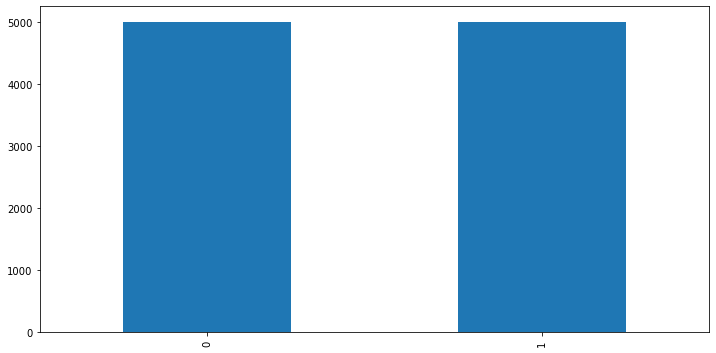

In [8]:
df['labels'].value_counts().plot(kind='bar')

### Spearman Correlation

By looking the spearman correlation, we can find which features are linearly correlated in terms of predicting if a site is phising or not

# First 10 columns

By looking at the first 10 columns against labels, we can concluded that non of the features have strong correlation with the labels, however, NumDash has some significant negative effect towards the labels, which could mean if there is less number of dash then it is more likely to be phising site

In [9]:
corr_heatmap(df, 0, 10)

# Columns 10 to 20

There are no strong or even medium level strength correlation features with labels

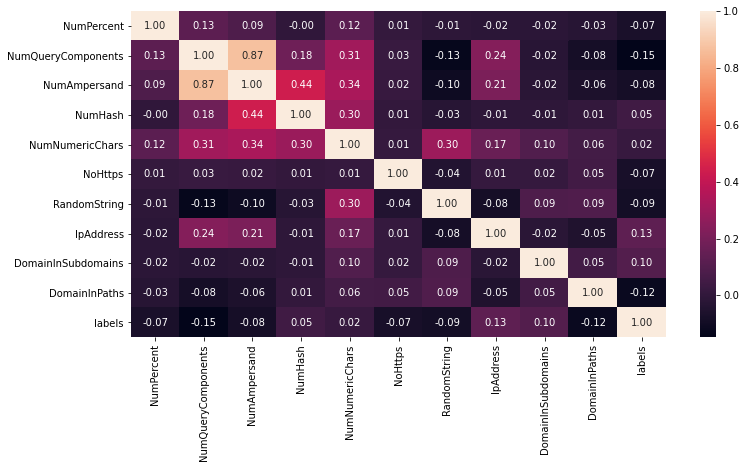

In [10]:
corr_heatmap(df, 10, 20)

# Columns 20 to 30

Still no strong correlation feature

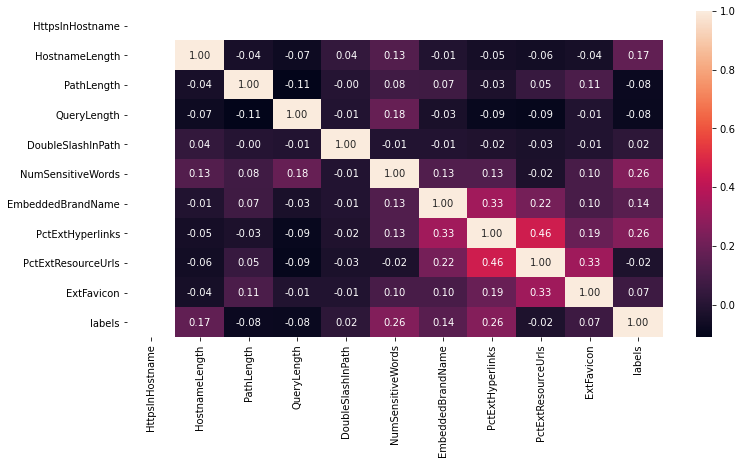

In [11]:
corr_heatmap(df, 20, 30)

# Columns 30 to 40

Well here we have a few features that are linearly correlated to our dep variable

* InsecureForms shows that as the value is higher so the probability of being a phising site
* PctNullSelfRedirectHyperlinks shows the same positive correlation as InsecureForms
* FequentDomainNameMismatch shows that it has medium linear correlation in positive direction
* SubmitInfoToEmail seems to indicate that sites that ask users to submit their details to emails seems to be more high probability for phising

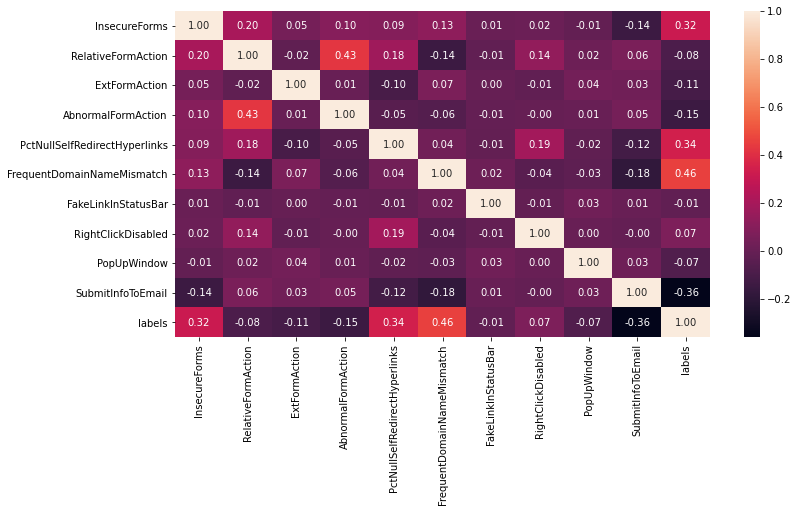

In [12]:
corr_heatmap(df, 30, 40)

# Columsn 40 to 50

The only column in this group that has some correlation with labels is PctExtNullSelfRedirectHyperlinksRT and it has negative effect towards labels which could mean that when the number of percent of null self redirect hyperlinks occur hence the probabiliy of phising increases

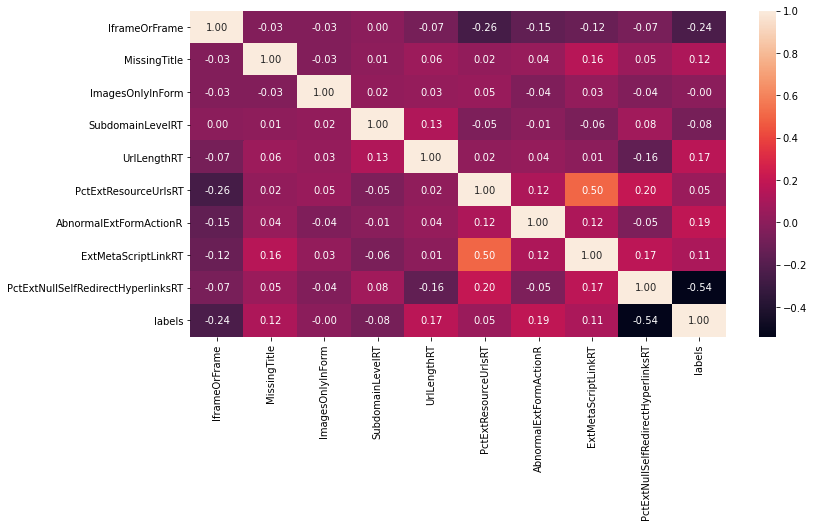

In [13]:
corr_heatmap(df, 40, 50)

## 4. Machine Learning Algorithms

In [14]:
features = df.columns[1:-1].tolist()

### 4.1 Setting Dataset

### 4.1.1 Unadjusted Dataset

In [15]:
y = df['labels'].copy()
X = df[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
#check that the target is not far off
print("Target Distribution Across Datasets")
pd.DataFrame([df.labels.describe(),y_train.describe(),y_test.describe()], index = ['Original Target', 'Training Target', 'Testing Target'])

Target Distribution Across Datasets


count    mean       std  min  25%  50%  75%  max
Original Target  10000.0  0.5000  0.500025  0.0  0.0  0.5  1.0  1.0
Training Target   8000.0  0.4985  0.500029  0.0  0.0  0.0  1.0  1.0
Testing Target    2000.0  0.5060  0.500089  0.0  0.0  1.0  1.0  1.0

### PCA - Unadjusted Dataset

In [17]:
# Standardising the features
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to training & test set
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

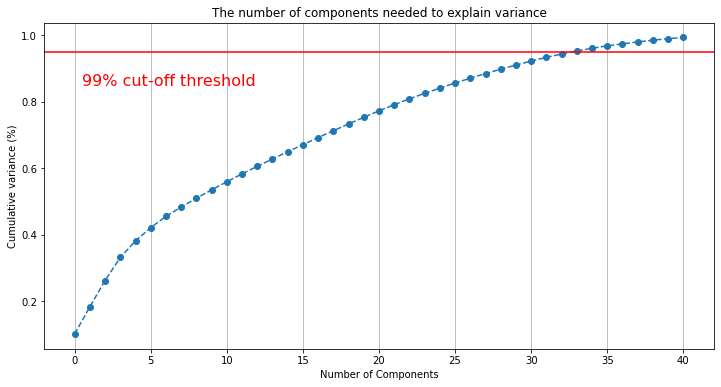

In [18]:
pca = PCA(n_components = 0.99)
pca.fit(X_train_standard)

fig, ax = plt.subplots()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o', linestyle = '--')
plt.ylabel('cumulative explained variance');
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [19]:
# make an instance of the model
pca = PCA(n_components = 33)
pca.fit(X_train_standard)

PCA(n_components=33)

In [20]:
# Apply the mapping/transofrm to both training and test set
X_train_PCA = pca.transform(X_train_standard)
X_train_PCA = pd.DataFrame(X_train_PCA, columns = features[:33])

X_test_PCA = pca.transform(X_test_standard)
X_test_PCA = pd.DataFrame(X_test_PCA, columns = features[:33])

In [21]:
pd.DataFrame(X_train_standard, columns = features).head()

NumDots  SubdomainLevel  PathLevel  UrlLength   NumDash  \
0 -0.328137        0.568591  -0.696250  -0.877181 -0.580533   
1  0.414674        0.568591  -0.162878  -0.907410 -0.580533   
2  0.414674       -0.805232   0.370493  -0.514433 -0.580533   
3  0.414674        0.568591  -0.696250   0.573810  3.244529   
4 -1.070947       -0.805232   0.370493   0.936558  1.331998   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0          -0.255072 -0.019369    -0.115879      -0.289583   -0.116420   
1          -0.255072 -0.019369    -0.115879      -0.289583    1.475647   
2          -0.255072 -0.019369    -0.115879      -0.289583   -0.116420   
3          -0.255072 -0.019369    -0.115879      -0.289583   -0.116420   
4          -0.255072 -0.019369    -0.115879       2.433766   -0.116420   

   NumQueryComponents  NumAmpersand   NumHash  NumNumericChars   NoHttps  \
0           -0.335634     -0.242142 -0.047488        -0.185821  0.107265   
1           -0.335634     -0.242142 -0.047488        -0.290458  0.107265   
2           -0.335634     -0.242142 -0.047488         0.023452  0.107265   
3           -0.335634     -0.242142 -0.047488         0.860544  0.107265   
4            0.415015     -0.242142 -0.047488         0.023452  0.107265   

   RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
0      0.950237  -0.133945           -0.149547      -0.859067   
1      0.950237  -0.133945           -0.149547       1.164053   
2      0.950237  -0.133945           -0.149547      -0.859067   
3      0.950237  -0.133945           -0.149547       1.164053   
4      0.950237  -0.133945           -0.149547       1.164053   

   HttpsInHostname  HostnameLength  PathLength  QueryLength  \
0              0.0        0.638369   -1.037463    -0.349449   
1              0.0       -0.719469   -0.631794    -0.349449   
2              0.0       -0.225710   -0.266692    -0.349449   
3              0.0       -0.349149    1.234283    -0.349449   
4              0.0       -0.966348    0.544646     1.031877   

   DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  PctExtHyperlinks  \
0          -0.029593          -0.296022          -0.246713         -0.271837   
1          -0.029593          -0.296022           4.053294         -0.704673   
2          -0.029593          -0.296022          -0.246713         -0.704673   
3          -0.029593          -0.296022          -0.246713         -0.603227   
4          -0.029593          -0.296022          -0.246713         -0.331697   

   PctExtResourceUrls  ExtFavicon  InsecureForms  RelativeFormAction  \
0           -0.662533   -0.448957       0.433591            -0.57889   
1            1.574072    2.227387       0.433591            -0.57889   
2           -0.497731    2.227387       0.433591            -0.57889   
3           -0.856661   -0.448957       0.433591            -0.57889   
4           -0.840105   -0.448957      -2.306321            -0.57889   

   ExtFormAction  AbnormalFormAction  PctNullSelfRedirectHyperlinks  \
0       2.991697           -0.246998                       0.153444   
1      -0.334258           -0.246998                      -0.437779   
2      -0.334258           -0.246998                       2.754824   
3      -0.334258           -0.246998                      -0.349096   
4      -0.334258           -0.246998                      -0.437779   

   FrequentDomainNameMismatch  FakeLinkInStatusBar  RightClickDisabled  \
0                   -0.524891            -0.074367           -0.122355   
1                    1.905159            -0.074367           -0.122355   
2                   -0.524891            -0.074367           -0.122355   
3                   -0.524891            -0.074367           -0.122355   
4                   -0.524891            -0.074367           -0.122355   

   PopUpWindow  SubmitInfoToEmail  IframeOrFrame  MissingTitle  \
0    -0.074367          -0.382487      -0.721943     -0.185455   
1    -0.074367          -0.382487  

In [22]:
X_train_PCA.head()

NumDots  SubdomainLevel  PathLevel  UrlLength   NumDash  \
0 -1.362000       -1.620611  -0.066090   0.273685  1.466508   
1 -1.845276        2.652227   0.784514   1.142560 -0.555078   
2 -1.193452       -0.758311   0.404952   0.484845 -1.086943   
3  2.008176       -0.576020  -0.261474  -2.901336 -0.958771   
4  2.013071        0.149226  -1.819895  -1.920736 -1.157905   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0           0.672301  0.837678     0.419013       0.272836   -0.565742   
1          -0.841150  1.000549     0.787560      -0.255201    1.331804   
2           1.345604 -1.754811     1.565307      -0.548644    0.235452   
3          -1.001747  0.750318     0.040130      -0.354834   -0.312340   
4          -1.081510 -0.029852    -1.211514       1.062397    0.915422   

   NumQueryComponents  NumAmpersand   NumHash  NumNumericChars   NoHttps  \
0           -0.413103      2.849840 -0.426892        -0.541082  0.072112   
1           -0.097585     -1.618644 -0.204631        -0.344630  1.593987   
2           -1.124775     -0.097666  0.105438         0.189485 -0.073640   
3            0.082300     -0.342028 -1.088972         0.153433 -0.270268   
4            0.511334     -0.066103 -0.616576         0.120195 -0.565363   

   RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
0      0.122842  -0.003152           -0.228880       0.110527   
1     -0.246434  -0.563907            0.027596       0.129629   
2     -0.071567   0.514822           -0.032861       0.284809   
3     -0.339986  -0.398610           -0.160667       0.987152   
4      0.193366   0.682521           -0.309797      -0.343717   

   HttpsInHostname  HostnameLength  PathLength  QueryLength  \
0        -1.451952        0.042492   -0.266146    -0.816393   
1         0.057550        0.325338    1.382567    -0.925598   
2        -0.925211        0.184603   -0.418159    -1.197160   
3         0.948209       -0.552083   -1.306135     0.071643   
4        -0.484866       -0.240496    0.737348     0.185959   

   DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  PctExtHyperlinks  \
0           0.646403          -0.721134           0.145890         -0.059519   
1          -0.676929          -3.504377           1.147262         -0.118841   
2          -0.477410          -0.630828          -0.626550          1.200615   
3           1.890225           0.125177           0.352155         -0.229177   
4          -0.827381          -0.179028          -1.058223         -0.725208   

   PctExtResourceUrls  ExtFavicon  InsecureForms  RelativeFormAction  \
0            0.575050    0.145702       0.554161           -0.203852   
1            1.000567   -0.690403      -0.439250            0.289195   
2            0.882474   -0.309376       1.197263            0.049045   
3            0.837871   -0.438837       0.739757           -0.169809   
4            0.637247    0.243553       1.450237           -0.356042   

   ExtFormAction  AbnormalFormAction  
0      -0.470319           -0.136137  
1      -0.377737           -0.073366  
2      -0.364250           -0.025144  
3      -1.207684            1.061814  
4       0.482739           -0.374135

In [23]:
df_PCA = X_train_PCA.join(y_train.copy())
df_PCA['labels'] = df_PCA['labels'].fillna(0)
df_PCA.head()

NumDots  SubdomainLevel  PathLevel  UrlLength   NumDash  \
0 -1.362000       -1.620611  -0.066090   0.273685  1.466508   
1 -1.845276        2.652227   0.784514   1.142560 -0.555078   
2 -1.193452       -0.758311   0.404952   0.484845 -1.086943   
3  2.008176       -0.576020  -0.261474  -2.901336 -0.958771   
4  2.013071        0.149226  -1.819895  -1.920736 -1.157905   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
0           0.672301  0.837678     0.419013       0.272836   -0.565742   
1          -0.841150  1.000549     0.787560      -0.255201    1.331804   
2           1.345604 -1.754811     1.565307      -0.548644    0.235452   
3          -1.001747  0.750318     0.040130      -0.354834   -0.312340   
4          -1.081510 -0.029852    -1.211514       1.062397    0.915422   

   NumQueryComponents  NumAmpersand   NumHash  NumNumericChars   NoHttps  \
0           -0.413103      2.849840 -0.426892        -0.541082  0.072112   
1           -0.097585     -1.618644 -0.204631        -0.344630  1.593987   
2           -1.124775     -0.097666  0.105438         0.189485 -0.073640   
3            0.082300     -0.342028 -1.088972         0.153433 -0.270268   
4            0.511334     -0.066103 -0.616576         0.120195 -0.565363   

   RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
0      0.122842  -0.003152           -0.228880       0.110527   
1     -0.246434  -0.563907            0.027596       0.129629   
2     -0.071567   0.514822           -0.032861       0.284809   
3     -0.339986  -0.398610           -0.160667       0.987152   
4      0.193366   0.682521           -0.309797      -0.343717   

   HttpsInHostname  HostnameLength  PathLength  QueryLength  \
0        -1.451952        0.042492   -0.266146    -0.816393   
1         0.057550        0.325338    1.382567    -0.925598   
2        -0.925211        0.184603   -0.418159    -1.197160   
3         0.948209       -0.552083   -1.306135     0.071643   
4        -0.484866       -0.240496    0.737348     0.185959   

   DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  PctExtHyperlinks  \
0           0.646403          -0.721134           0.145890         -0.059519   
1          -0.676929          -3.504377           1.147262         -0.118841   
2          -0.477410          -0.630828          -0.626550          1.200615   
3           1.890225           0.125177           0.352155         -0.229177   
4          -0.827381          -0.179028          -1.058223         -0.725208   

   PctExtResourceUrls  ExtFavicon  InsecureForms  RelativeFormAction  \
0            0.575050    0.145702       0.554161           -0.203852   
1            1.000567   -0.690403      -0.439250            0.289195   
2            0.882474   -0.309376       1.197263            0.049045   
3            0.837871   -0.438837       0.739757           -0.169809   
4            0.637247    0.243553       1.450237           -0.356042   

   ExtFormAction  AbnormalFormAction  labels  
0      -0.470319           -0.136137     0.0  
1      -0.377737           -0.073366     1.0  
2      -0.364250           -0.025144     1.0  
3      -1.207684            1.061814     0.0  
4       0.482739           -0.374135     1.0

### 4.1.2 Adjusted Dataset

In [24]:
df_0 = df[df['labels'] == 0.0]
df_1 = df[df['labels'] == 1.0]

#### df_adj5 (50% Target = 1, 100% Target = 0)

In [25]:
df_adj5 = pd.concat([df_0, df_1.sample(frac = 0.5)], axis = 0)
df_adj5.describe()

id      NumDots  SubdomainLevel    PathLevel    UrlLength  \
count   7500.000000  7500.000000     7500.000000  7500.000000  7500.000000   
mean    5826.782533     2.303200        0.570933     3.158000    71.161467   
std     2770.430106     1.200998        0.677025     1.863733    32.577331   
min        1.000000     1.000000        0.000000     0.000000    12.000000   
25%     3731.750000     2.000000        0.000000     2.000000    48.000000   
50%     6250.500000     2.000000        1.000000     3.000000    64.000000   
75%     8125.250000     3.000000        1.000000     4.000000    86.000000   
max    10000.000000    21.000000        9.000000    18.000000   252.000000   

           NumDash  NumDashInHostname     AtSymbol  TildeSymbol  \
count  7500.000000        7500.000000  7500.000000  7500.000000   
mean      2.207733           0.112667     0.000400     0.009733   
std       3.431348           0.483602     0.019997     0.098183   
min       0.000000           0.000000     0.000000     0.000000   
25%       0.000000           0.000000     0.000000     0.000000   
50%       1.000000           0.000000     0.000000     0.000000   
75%       3.000000           0.000000     0.000000     0.000000   
max      55.000000           9.000000     1.000000     1.000000   

       NumUnderscore   NumPercent  NumQueryComponents  NumAmpersand  \
count    7500.000000  7500.000000         7500.000000   7500.000000   
mean        0.360933     0.088667            0.523867      0.302800   
std         1.184981     0.698238            1.392200      1.105173   
min         0.000000     0.000000            0.000000      0.000000   
25%         0.000000     0.000000            0.000000      0.000000   
50%         0.000000     0.000000            0.000000      0.000000   
75%         0.000000     0.000000            0.000000      0.000000   
max        18.000000    19.000000           23.000000     22.000000   

           NumHash  NumNumericChars      NoHttps  RandomString    IpAddress  \
count  7500.000000      7500.000000  7500.000000   7500.000000  7500.000000   
mean      0.001467         5.784800     0.991733      0.538267     0.011333   
std       0.038272         8.583879     0.090551      0.498567     0.105860   
min       0.000000         0.000000     0.000000      0.000000     0.000000   
25%       0.000000         0.000000     1.000000      0.000000     0.000000   
50%       0.000000         4.000000     1.000000      1.000000     0.000000   
75%       0.000000         8.000000     1.000000      1.000000     0.000000   
max       1.000000        88.000000     1.000000      1.000000     1.000000   

       DomainInSubdomains  DomainInPaths  HttpsInHostname  HostnameLength  \
count          7500.00000    7500.000000           7500.0     7500.000000   
mean              0.01680       0.446000              0.0       18.375867   
std               0.12853       0.497109              0.0        7.481421   
min               0.00000       0.000000              0.0        4.000000   
25%               0.00000       0.000000              0.0       14.000000   
50%               0.00000       0.000000              0.0       17.000000   
75%               0.00000       1.000000              0.0       21.000000   
max               1.00000       1.000000              0.0      137.000000   

        PathLength  QueryLength  DoubleSlashInPath  NumSensitiveWords  \
count  7500.000000  7500.000000        7500.000000        7500.000000   
mean     36.292667     9.219067           0.000667           0.076533   
std      25.310734    24.036880           0.025813           0.306412   
min       0.000000     0.000000           0.000000           0.000000   
25%      17.000000     0.000000           0.000000           0.000000   
50%      31.000000     0.000000           0.000000           0.000000   
75%      50.000000     0.000000           0.000000           0.000000   
max     161.000000   188.000000           1.000000           3.000000   

      

In [26]:
y_adj5 = df_adj5['labels'].copy() # target
X_adj5 = df_adj5[features].copy()
X_train_adj5, X_test_adj5, y_train_adj5, y_test_adj5 = train_test_split(X_adj5, y_adj5, test_size=0.20, random_state=42)

print("Target Distribution Across Datasets")
pd.DataFrame([df_adj5.labels.describe(),y_train_adj5.describe(),y_test_adj5.describe()], index = ['Original Target', 'Training Target', 'Testing Target'])

Target Distribution Across Datasets


count      mean       std  min  25%  50%  75%  max
Original Target  7500.0  0.333333  0.471436  0.0  0.0  0.0  1.0  1.0
Training Target  6000.0  0.336500  0.472552  0.0  0.0  0.0  1.0  1.0
Testing Target   1500.0  0.320667  0.466889  0.0  0.0  0.0  1.0  1.0

#### df_adj2 (20% Target = 1, 100% Target = 0)

In [27]:
df_adj2 = pd.concat([df_0, df_1.sample(frac = 0.2)], axis = 0)
df_adj2.describe()

id      NumDots  SubdomainLevel    PathLevel    UrlLength  \
count   6000.000000  6000.000000     6000.000000  6000.000000  6000.000000   
mean    6668.664167     2.178833        0.561333     3.000833    71.681500   
std     2354.448201     1.134196        0.606877     1.847630    31.462227   
min        2.000000     1.000000        0.000000     0.000000    12.000000   
25%     5500.750000     1.000000        0.000000     2.000000    50.000000   
50%     7000.500000     2.000000        1.000000     3.000000    66.000000   
75%     8500.250000     3.000000        1.000000     4.000000    88.000000   
max    10000.000000    21.000000       10.000000    18.000000   252.000000   

           NumDash  NumDashInHostname     AtSymbol  TildeSymbol  \
count  6000.000000        6000.000000  6000.000000  6000.000000   
mean      2.580500           0.083333     0.000500     0.005167   
std       3.688286           0.395915     0.022357     0.071700   
min       0.000000           0.000000     0.000000     0.000000   
25%       0.000000           0.000000     0.000000     0.000000   
50%       1.000000           0.000000     0.000000     0.000000   
75%       4.000000           0.000000     0.000000     0.000000   
max      55.000000           9.000000     1.000000     1.000000   

       NumUnderscore   NumPercent  NumQueryComponents  NumAmpersand  \
count    6000.000000  6000.000000         6000.000000   6000.000000   
mean        0.398833     0.102167            0.588000      0.341833   
std         1.253406     0.764957            1.395199      1.129393   
min         0.000000     0.000000            0.000000      0.000000   
25%         0.000000     0.000000            0.000000      0.000000   
50%         0.000000     0.000000            0.000000      0.000000   
75%         0.000000     0.000000            0.000000      0.000000   
max        18.000000    19.000000           23.000000     22.000000   

           NumHash  NumNumericChars      NoHttps  RandomString    IpAddress  \
count  6000.000000      6000.000000  6000.000000   6000.000000  6000.000000   
mean      0.001167         5.596333     0.994000      0.551667     0.006167   
std       0.034139         7.279003     0.077233      0.497365     0.078292   
min       0.000000         0.000000     0.000000      0.000000     0.000000   
25%       0.000000         0.000000     1.000000      0.000000     0.000000   
50%       0.000000         4.000000     1.000000      1.000000     0.000000   
75%       0.000000         8.000000     1.000000      1.000000     0.000000   
max       1.000000        88.000000     1.000000      1.000000     1.000000   

       DomainInSubdomains  DomainInPaths  HttpsInHostname  HostnameLength  \
count         6000.000000    6000.000000           6000.0     6000.000000   
mean             0.012167       0.466333              0.0       17.899833   
std              0.109639       0.498907              0.0        6.473030   
min              0.000000       0.000000              0.0        4.000000   
25%              0.000000       0.000000              0.0       14.000000   
50%              0.000000       0.000000              0.0       17.000000   
75%              0.000000       1.000000              0.0       21.000000   
max              1.000000       1.000000              0.0       94.000000   

        PathLength  QueryLength  DoubleSlashInPath  NumSensitiveWords  \
count  6000.000000  6000.000000        6000.000000        6000.000000   
mean     36.632167     9.853500           0.000500           0.043000   
std      26.035633    23.922787           0.022357           0.232006   
min       0.000000     0.000000           0.000000           0.000000   
25%      17.000000     0.000000           0.000000           0.000000   
50%      31.000000     0.000000           0.000000           0.000000   
75%      52.000000     6.000000           0.000000           0.000000   
max     161.000000   188.000000           1.000000           3.000000   

      

In [28]:
y_adj2 = df_adj2['labels'].copy() # target
X_adj2 = df_adj2[features].copy()
X_train_adj2, X_test_adj2, y_train_adj2, y_test_adj2 = train_test_split(X_adj2, y_adj2, test_size=0.20, random_state=42)

print("Target Distribution Across Datasets")
pd.DataFrame([df_adj2.labels.describe(),y_train_adj2.describe(),y_test_adj2.describe()], index = ['Original Target', 'Training Target', 'Testing Target'])

Target Distribution Across Datasets


count      mean       std  min  25%  50%  75%  max
Original Target  6000.0  0.166667  0.372709  0.0  0.0  0.0  0.0  1.0
Training Target  4800.0  0.167917  0.373831  0.0  0.0  0.0  0.0  1.0
Testing Target   1200.0  0.161667  0.368298  0.0  0.0  0.0  0.0  1.0

## 4.2 Decision Tree

### 4.2.1 Blind Run

In [140]:
classifier = DecisionTreeClassifier(class_weight=None,
            criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')

# Original Dataset
clf_og = classifier.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

# PCA (Original Dataset)
clf_PCA = classifier.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

# Adjusted Dataset(50%)
clf_5 = classifier.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

# Adjusted Dataset(20%)
clf_2 = classifier.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

In [141]:
pd.DataFrame(np.array([[acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Accuracy  F1 Score     TP     TN     FP    FN
Original Dataset          0.9465  0.947420  964.0  929.0   59.0  48.0
PCA (Original Dataset)    0.8485  0.858080  916.0  781.0  207.0  96.0
Adjusted Dataset(50%)     0.9320  0.899804  458.0  940.0   79.0  23.0
Adjusted Dataset(20%)     0.9450  0.847222  183.0  951.0   55.0  11.0

### 4.2.2 Cross Validating

In [142]:
###### Original Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    classifier.fit(feats,label) #it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_og = pd.DataFrame({'Score':scr,'Fold':fold})

In [143]:
###### PCA Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_PCA)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    classifier.fit(feats,label) #it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_PCA = pd.DataFrame({'Score':scr,'Fold':fold})

In [144]:
###### Adjusted Dataset 50% ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj5)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    classifier.fit(feats,label) #it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_5 = pd.DataFrame({'Score':scr,'Fold':fold})

In [145]:
##### Adjusted Dataset 20% #####
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj2)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    classifier.fit(feats,label) #it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_2 = pd.DataFrame({'Score':scr,'Fold':fold})

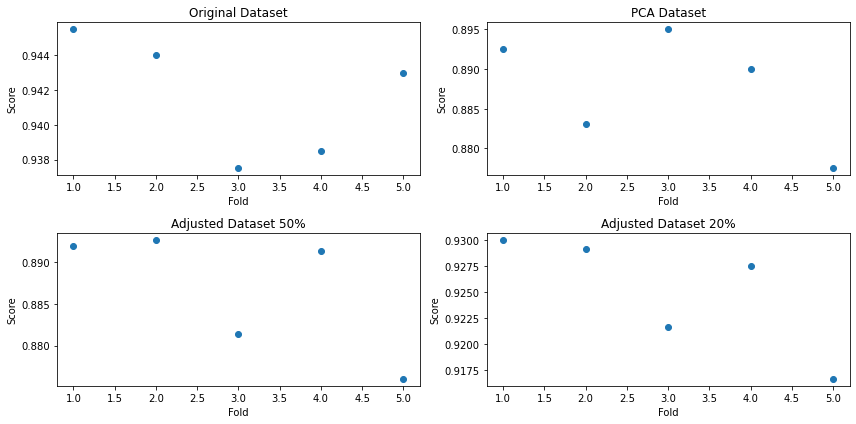

In [146]:
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(performance_og['Fold'], performance_og['Score'])
axs[0,0].set_title("Original Dataset")
axs[0,1].scatter(performance_PCA['Fold'], performance_PCA['Score'])
axs[0,1].set_title("PCA Dataset")
axs[1,0].scatter(performance_5['Fold'], performance_5['Score'])
axs[1,0].set_title("Adjusted Dataset 50%")
axs[1,1].scatter(performance_2['Fold'], performance_2['Score'])
axs[1,1].set_title("Adjusted Dataset 20%")


for ax in axs.flat:
    ax.set(xlabel = 'Fold', ylabel = 'Score')
    
fig.tight_layout()
plt.show()

### 4.2.3 GridSearch using Accuracy

In [147]:
###### ORIGINAL DATASET #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy')
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

In [148]:
###### PCA DATASET #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy')
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

In [29]:
###### ADJUSTED DATASET 50% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy')
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

In [42]:
###### ADJUSTED DATASET 20% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy')
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Highest accuaracy & F1 Score

In [43]:
X_set = X_test_adj2.copy()
y_set = (pd.DataFrame(pred_2, columns = ['labels'])).copy()
set = X_set.join(y_set)
set['labels'] = set['labels'].fillna(0)

set_1 = set[set['labels'] == 1.0]
set_1[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()

set_0 = set[set['labels'] == 0.0]
set_0[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()

PctExtNullSelfRedirectHyperlinksRT  PctExtHyperlinks
count                         1200.000000       1200.000000
mean                             0.651667          0.171591
std                              0.666359          0.231881
min                             -1.000000          0.000000
25%                              1.000000          0.024574
50%                              1.000000          0.090652
75%                              1.000000          0.204664
max                              1.000000          1.000000

In [51]:
set_1 = set[set['labels'] == 1.0]
set_1[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()

PctExtNullSelfRedirectHyperlinksRT  PctExtHyperlinks
count                             4.00000          4.000000
mean                              0.50000          0.211675
std                               0.57735          0.247588
min                               0.00000          0.000000
25%                               0.00000          0.000000
50%                               0.50000          0.187500
75%                               1.00000          0.399175
max                               1.00000          0.471698

In [52]:
set_0 = set[set['labels'] == 0.0]
set_0[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()

PctExtNullSelfRedirectHyperlinksRT  PctExtHyperlinks
count                         1196.000000       1196.000000
mean                             0.652174          0.171457
std                              0.666788          0.231925
min                             -1.000000          0.000000
25%                              1.000000          0.024845
50%                              1.000000          0.090652
75%                              1.000000          0.203914
max                              1.000000          1.000000

In [151]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Best Estimator  \
Original Dataset        DecisionTreeClassifier(criterion='entropy', ma...   
PCA (Original Dataset)  DecisionTreeClassifier(max_depth=9, max_leaf_n...   
Adjusted Dataset(50%)   DecisionTreeClassifier(max_depth=9, max_leaf_n...   
Adjusted Dataset(20%)   DecisionTreeClassifier(criterion='entropy', ma...   

                       Accuracy  F1 Score   TP   TN  FP  FN  
Original Dataset         0.9705  0.971007  988  953  35  24  
PCA (Original Dataset)   0.9095  0.909905  914  905  83  98  
Adjusted Dataset(50%)      0.96  0.939148  463  977  42  18  
Adjusted Dataset(20%)    0.9775  0.930946  182  991  15  12

#### Checking Feature Importance & Mutual Info

In [152]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [153]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

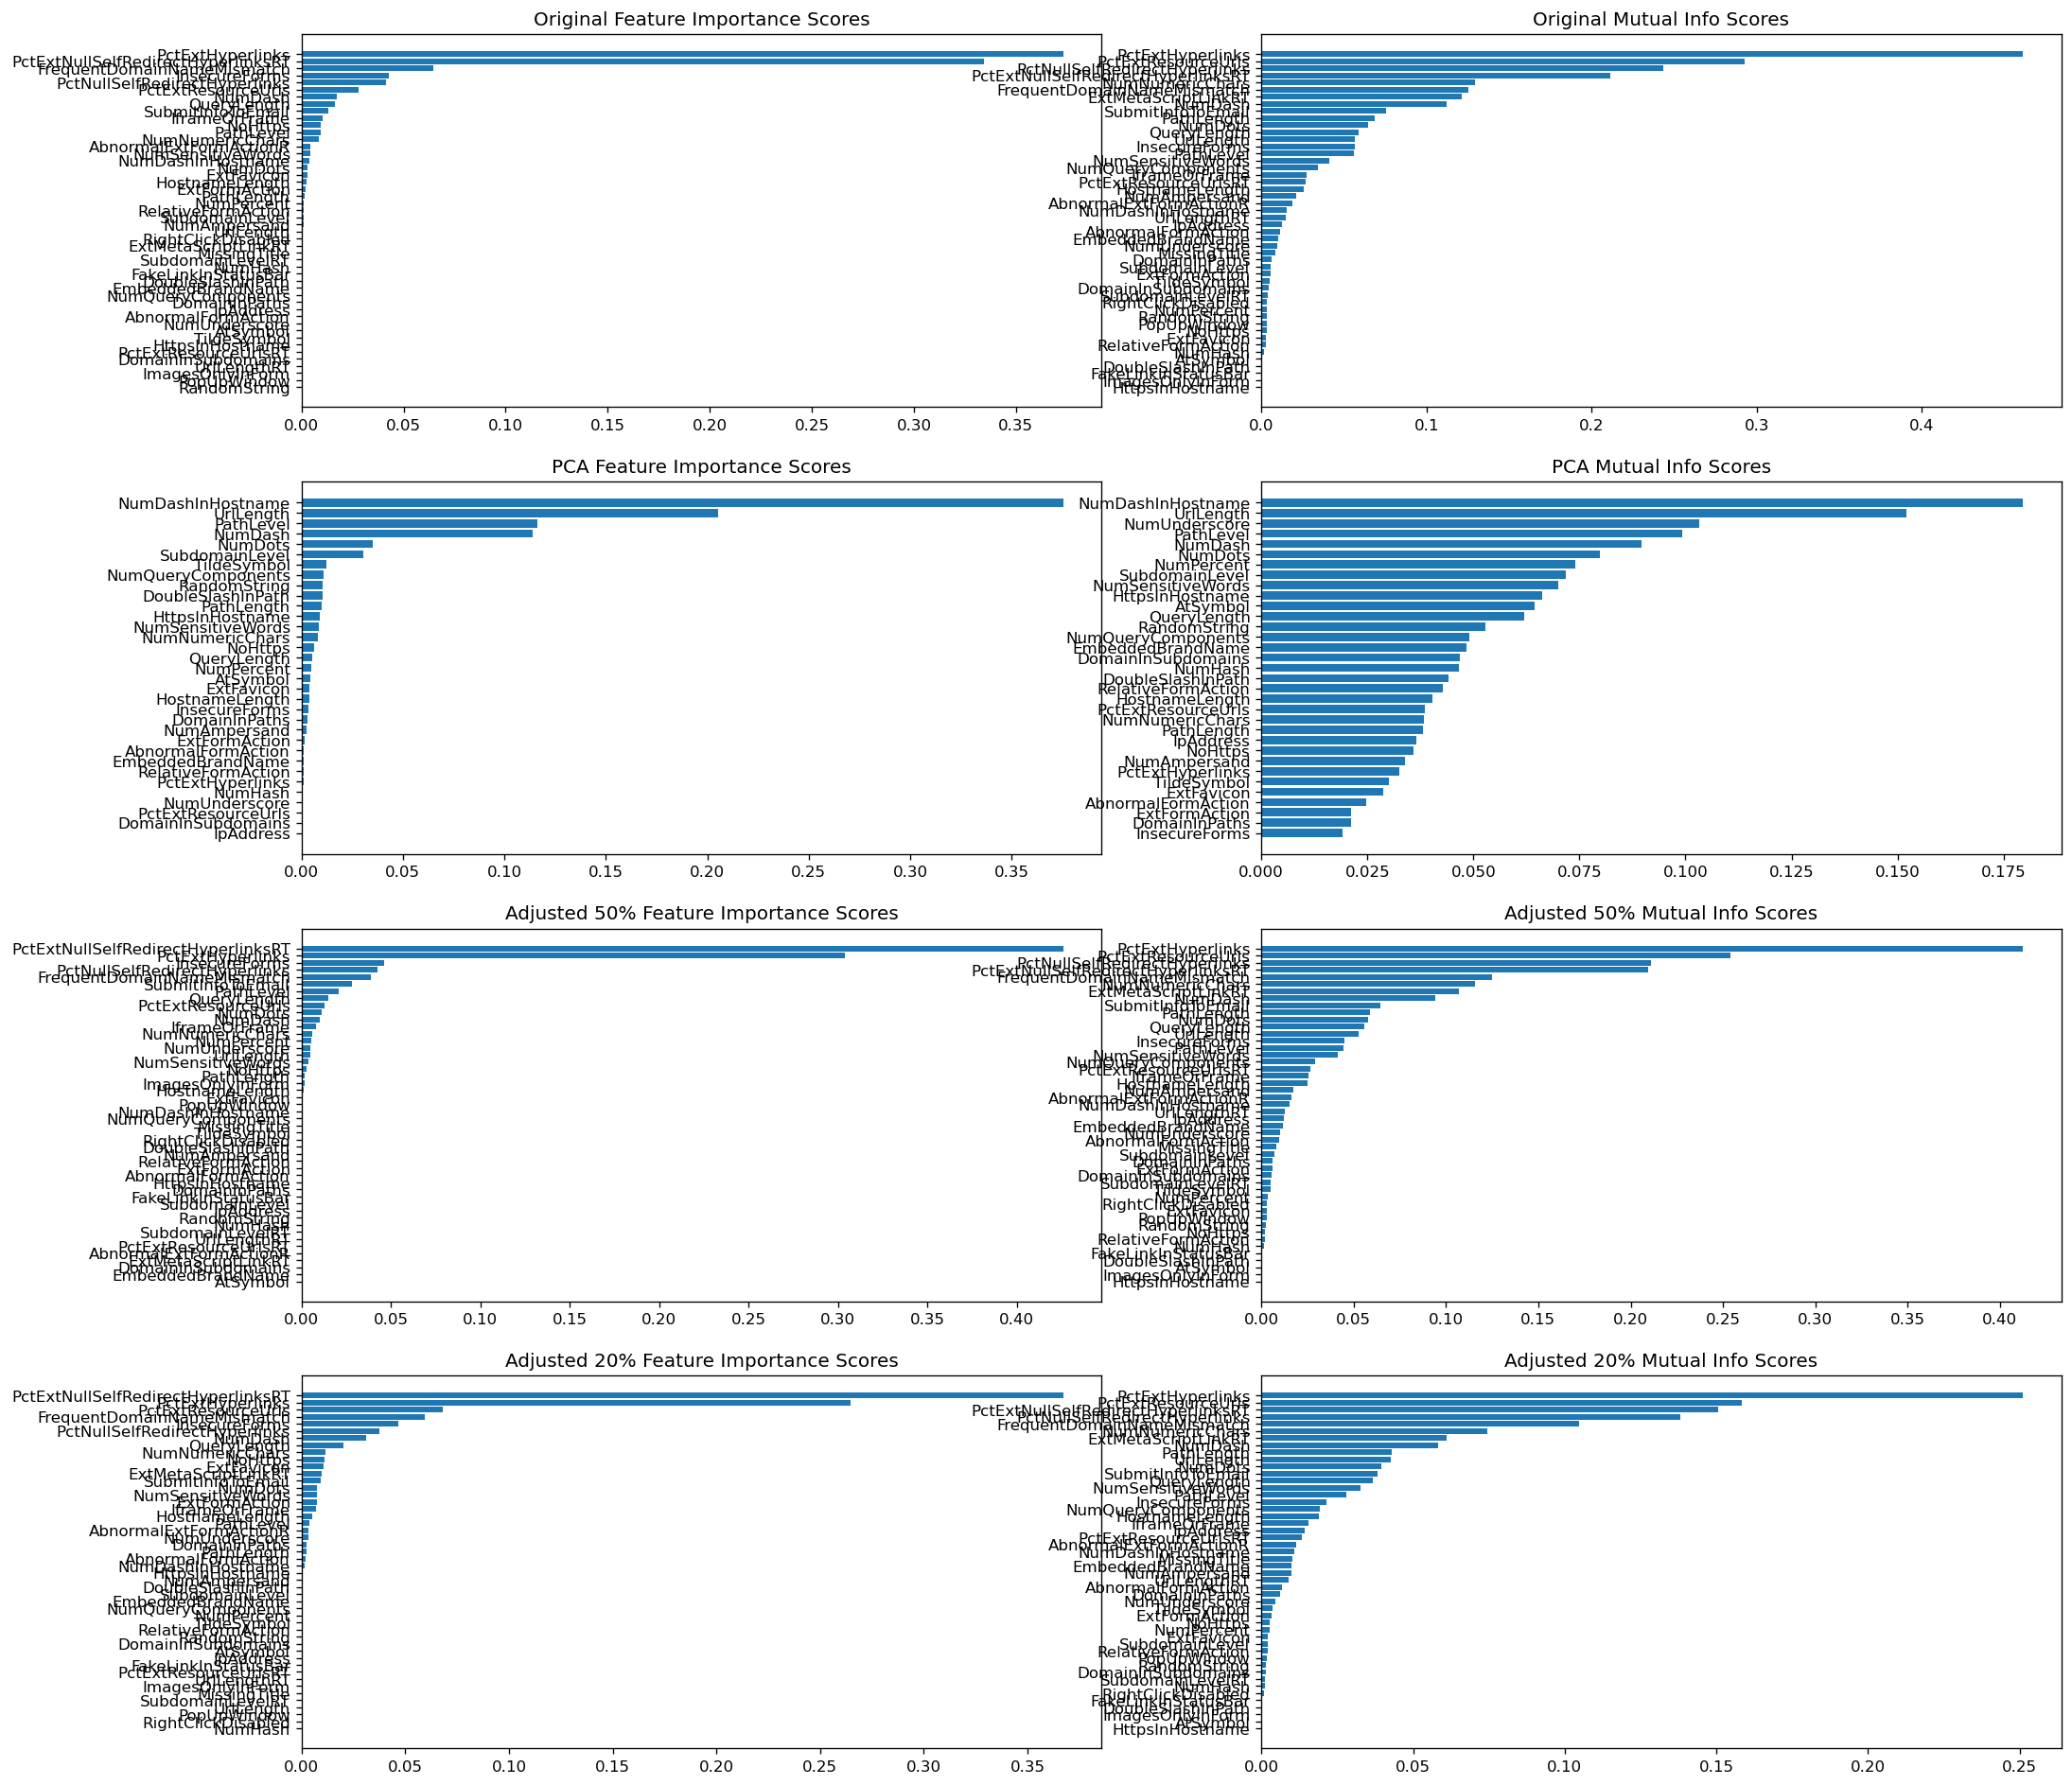

In [154]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

### 4.2.4 GridSearch using F1 Score

In [155]:
###### ORIGINAL DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'f1')
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

In [156]:
###### PCA DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'f1')
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

In [157]:
###### ADJUSTED DATASET 50% #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'f1')
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

In [158]:
###### ADJUSTED DATASET 20% #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'f1')
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

In [159]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Best Estimator  \
Original Dataset        DecisionTreeClassifier(criterion='entropy', ma...   
PCA (Original Dataset)  DecisionTreeClassifier(max_depth=9, max_leaf_n...   
Adjusted Dataset(50%)   DecisionTreeClassifier(max_depth=9, max_leaf_n...   
Adjusted Dataset(20%)   DecisionTreeClassifier(criterion='entropy', ma...   

                        Accuracy  F1 Score   TP   TN  FP  FN  
Original Dataset          0.9715  0.972073  992  951  37  20  
PCA (Original Dataset)      0.91  0.910448  915  905  83  97  
Adjusted Dataset(50%)       0.96  0.939394  465  975  44  16  
Adjusted Dataset(20%)   0.978333   0.93401  184  990  16  10

#### Checking Feature Importance & Mutual Info

In [160]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [161]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

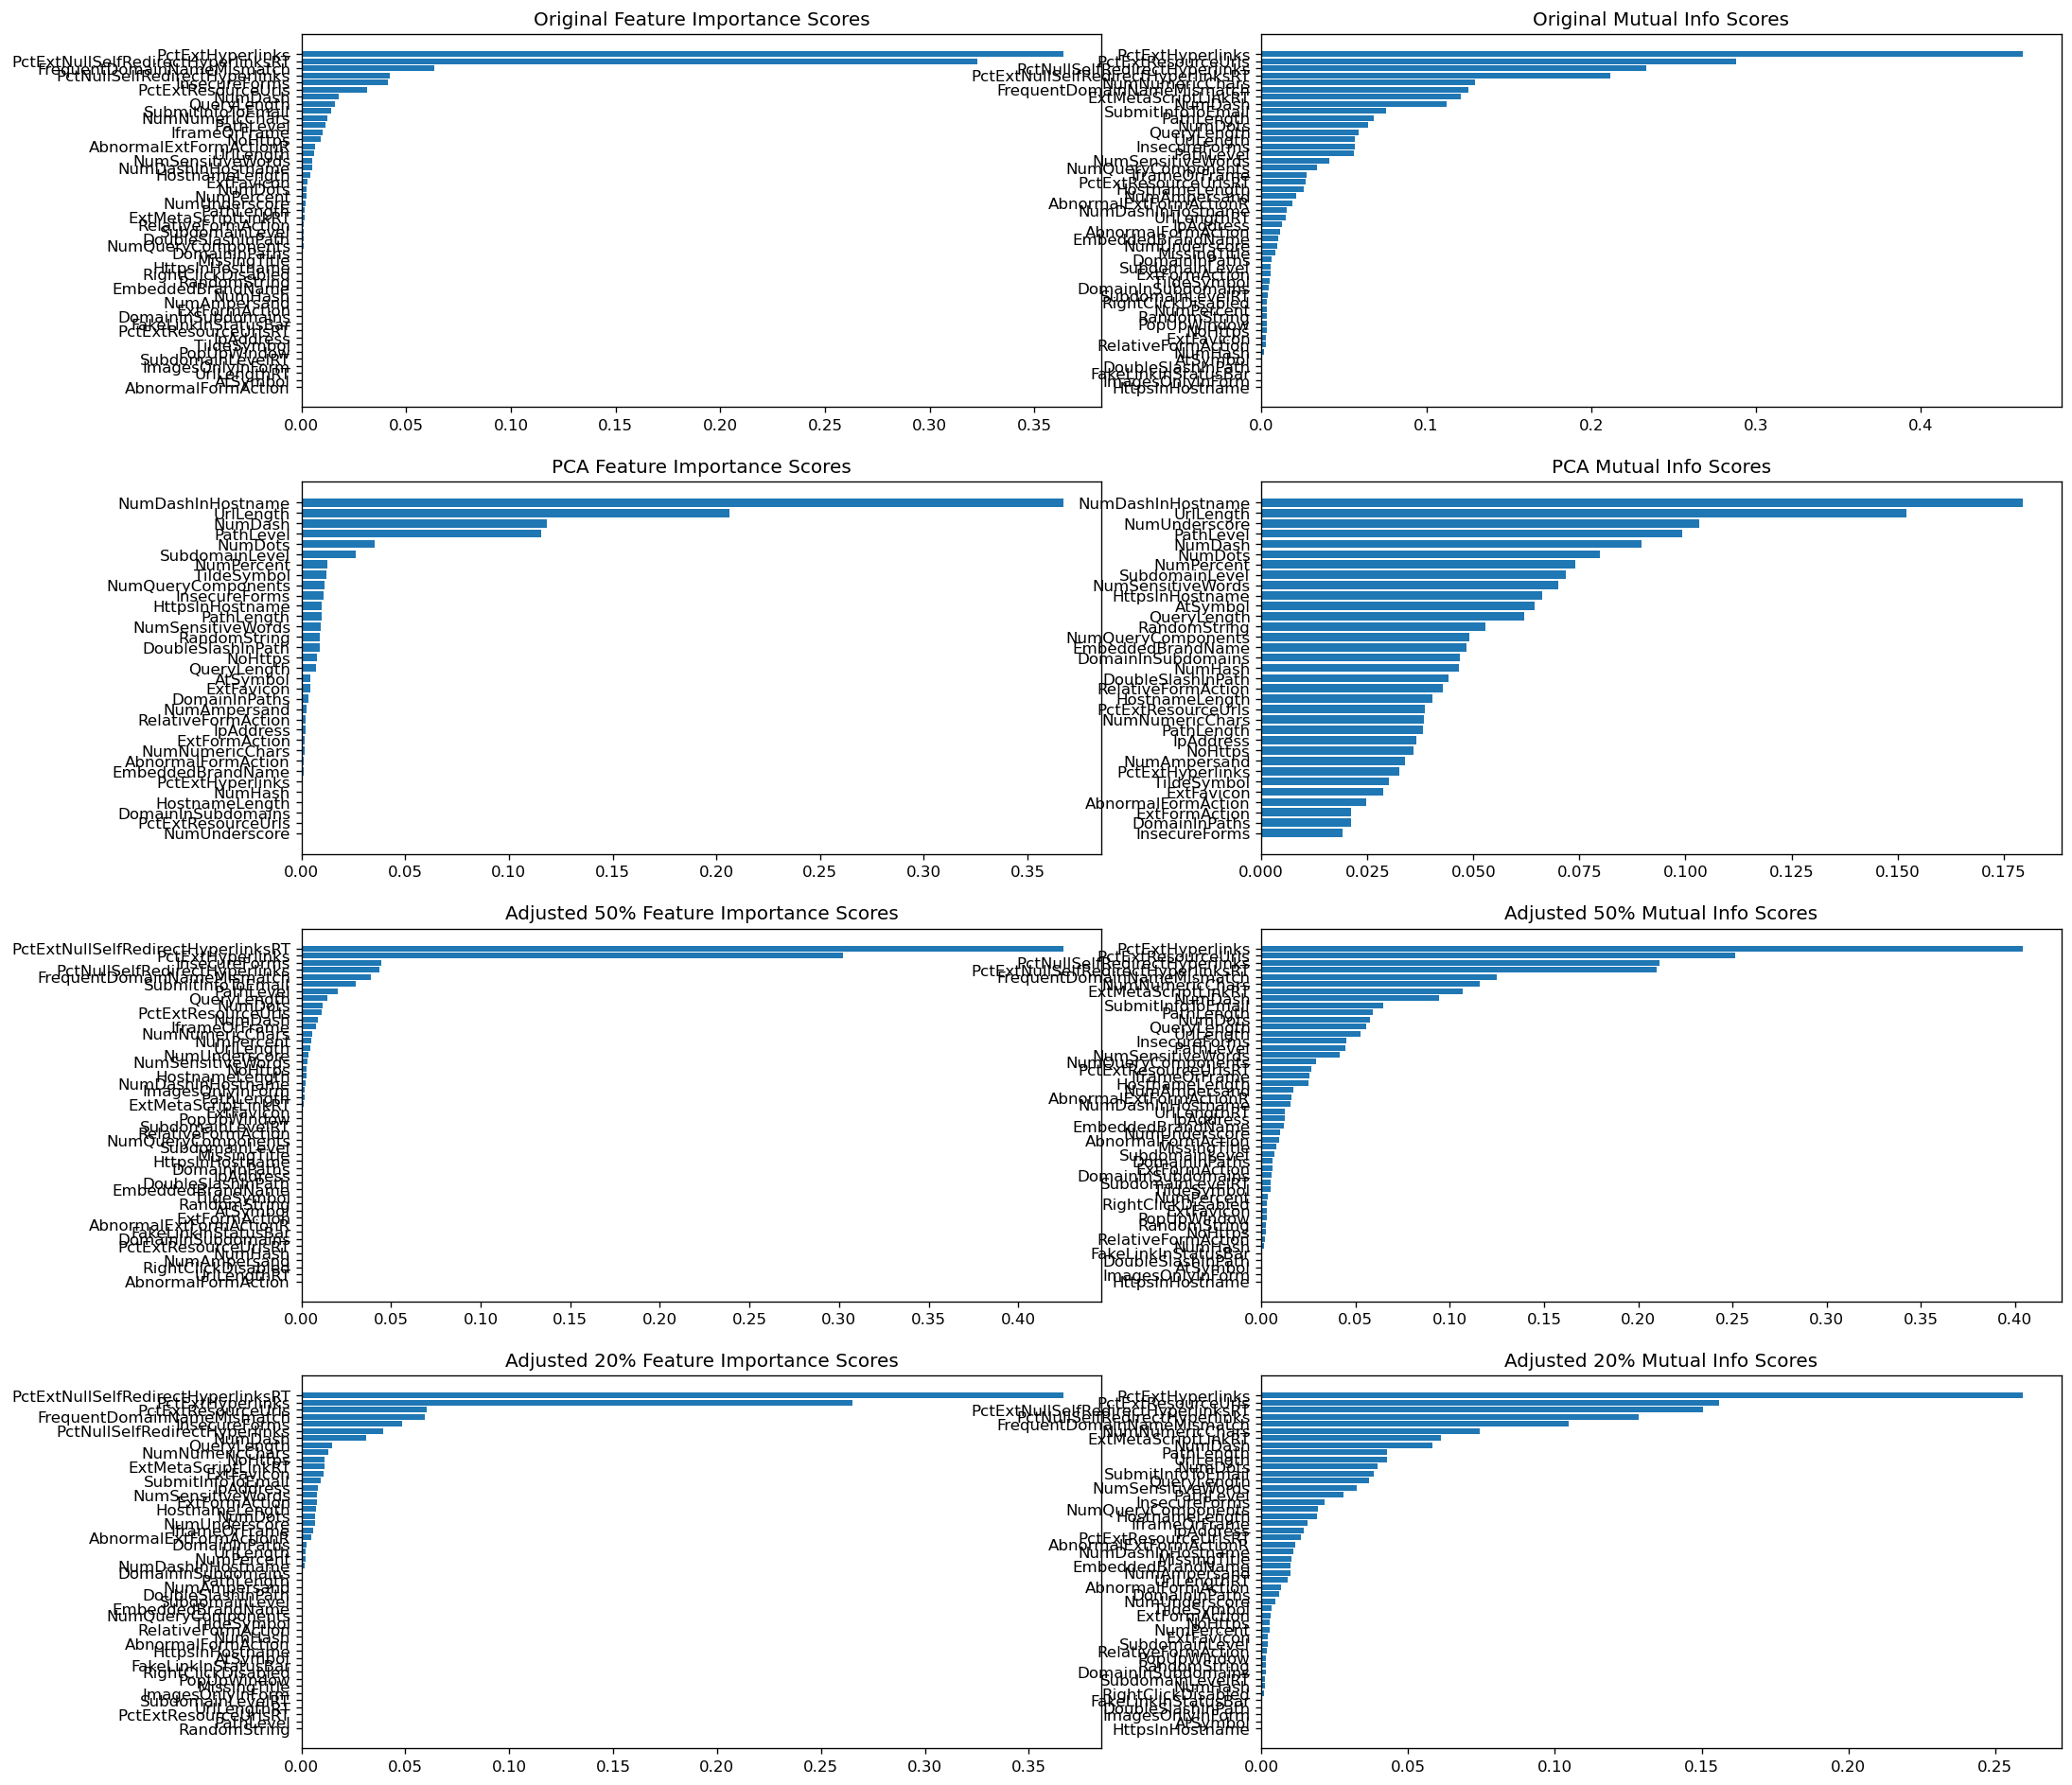

In [162]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

## 4.3 Random Forest

### 4.3.1 Blind Run

In [163]:
rf_classifier = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

# Original Dataset
clf_og = rf_classifier.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

# PCA (Original Dataset)
clf_PCA = rf_classifier.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

# Adjusted Dataset(50%)
clf_5 = rf_classifier.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

# Adjusted Dataset(20%)
clf_2 = rf_classifier.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

In [164]:
pd.DataFrame(np.array([[acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Accuracy  F1 Score     TP      TN    FP    FN
Original Dataset        0.985000  0.985163  996.0   974.0  14.0  16.0
PCA (Original Dataset)  0.958500  0.958891  968.0   949.0  39.0  44.0
Adjusted Dataset(50%)   0.976000  0.962578  463.0  1001.0  18.0  18.0
Adjusted Dataset(20%)   0.988333  0.963731  186.0  1000.0   6.0   8.0

### 4.3.2 Cross Validating

In [165]:
###### Original Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    rf_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = rf_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_og = pd.DataFrame({'Score':scr,'Fold':fold})

In [166]:
###### PCA Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_PCA)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    rf_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = rf_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_PCA = pd.DataFrame({'Score':scr,'Fold':fold})

In [167]:
###### Adjusted Dataset 50% ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj5)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    rf_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = rf_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_5 = pd.DataFrame({'Score':scr,'Fold':fold})

In [168]:
##### Adjusted Dataset 20% #####
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj2)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    rf_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = rf_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_2 = pd.DataFrame({'Score':scr,'Fold':fold})

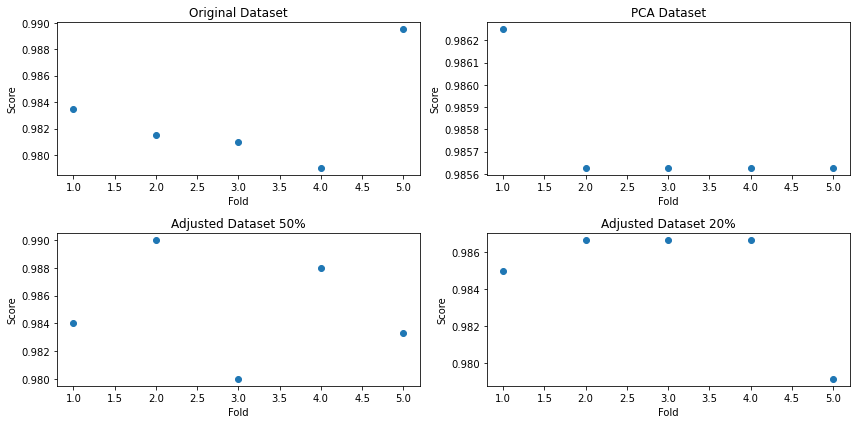

In [169]:
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(performance_og['Fold'], performance_og['Score'])
axs[0,0].set_title("Original Dataset")
axs[0,1].scatter(performance_PCA['Fold'], performance_PCA['Score'])
axs[0,1].set_title("PCA Dataset")
axs[1,0].scatter(performance_5['Fold'], performance_5['Score'])
axs[1,0].set_title("Adjusted Dataset 50%")
axs[1,1].scatter(performance_2['Fold'], performance_2['Score'])
axs[1,1].set_title("Adjusted Dataset 20%")


for ax in axs.flat:
    ax.set(xlabel = 'Fold', ylabel = 'Score')
    
fig.tight_layout()
plt.show()

### 4.3.3 GridSearch using Accuracy

In [170]:
###### ORIGINAL DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
              #'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)],
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.3s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.3s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.3s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.3s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   0.5s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.4s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.4s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.4s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.4s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.4s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   0.5s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   0.5s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.5s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.5s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.5s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.4s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.4s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.4s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.4s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.5s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.4s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.5s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.6s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.5s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.6s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.6s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.6s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.6s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [171]:
###### PCA DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)],
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.9s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.9s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.9s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.0s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.9s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   1.5s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.6s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.5s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.6s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.5s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.5s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   2.0s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   1.9s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   1.8s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   1.9s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.0s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.0s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.0s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.1s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.1s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   2.2s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   2.3s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   2.3s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.1s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.1s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.1s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.1s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   2.9s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   3.2s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [172]:
###### ADJUSTED DATASET 50% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)],
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.3s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   0.3s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.3s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.3s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.3s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.3s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.3s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   0.4s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   0.3s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.3s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.3s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.4s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.3s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.2s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.3s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.3s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.4s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.3s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.3s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.4s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.4s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.4s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.4s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.4s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.4s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [53]:
###### ADJUSTED DATASET 20% #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)],
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.1s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.1s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.1s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.1s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   0.2s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.2s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.2s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.2s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.2s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.3s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   0.2s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   0.3s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.2s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.2s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.2s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.3s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.2s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.2s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.2s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.3s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.2s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.2s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.3s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.3s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.3s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.3s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.3s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.3s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [54]:
X_set = X_test_adj2.copy()
y_set = (pd.DataFrame(pred_2, columns = ['labels'])).copy()
set = X_set.join(y_set)
set['labels'] = set['labels'].fillna(0)

'''set_1 = set[set['labels'] == 1.0]
set_1[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()

set_0 = set[set['labels'] == 0.0]
set_0[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()'''

"set_1 = set[set['labels'] == 1.0]\nset_1[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()\n\nset_0 = set[set['labels'] == 0.0]\nset_0[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()"

In [55]:
set_1 = set[set['labels'] == 1.0]
set_1[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()

PctExtNullSelfRedirectHyperlinksRT  PctExtHyperlinks
count                             5.00000          5.000000
mean                              0.20000          0.369340
std                               0.83666          0.412633
min                              -1.00000          0.000000
25%                               0.00000          0.000000
50%                               0.00000          0.375000
75%                               1.00000          0.471698
max                               1.00000          1.000000

In [56]:
set_0 = set[set['labels'] == 0.0]
set_0[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()

PctExtNullSelfRedirectHyperlinksRT  PctExtHyperlinks
count                         1195.000000       1195.000000
mean                             0.653556          0.170764
std                              0.665350          0.230779
min                             -1.000000          0.000000
25%                              1.000000          0.024814
50%                              1.000000          0.090395
75%                              1.000000          0.202813
max                              1.000000          1.000000

In [179]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]], dtype=object),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Best Estimator  \
Original Dataset        (DecisionTreeClassifier(max_depth=9, max_featu...   
PCA (Original Dataset)  (DecisionTreeClassifier(max_depth=9, max_featu...   
Adjusted Dataset(50%)   (DecisionTreeClassifier(criterion='entropy', m...   
Adjusted Dataset(20%)   (DecisionTreeClassifier(max_depth=9, max_featu...   

                        Accuracy  F1 Score   TP    TN  FP  FN  
Original Dataset           0.973  0.973267  983   963  25  29  
PCA (Original Dataset)    0.9475  0.947683  951   944  44  61  
Adjusted Dataset(50%)       0.97   0.95288  455  1000  19  26  
Adjusted Dataset(20%)   0.984167  0.950131  181  1000   6  13

#### Checking Feature Importance & Mutual Info

In [180]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [181]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

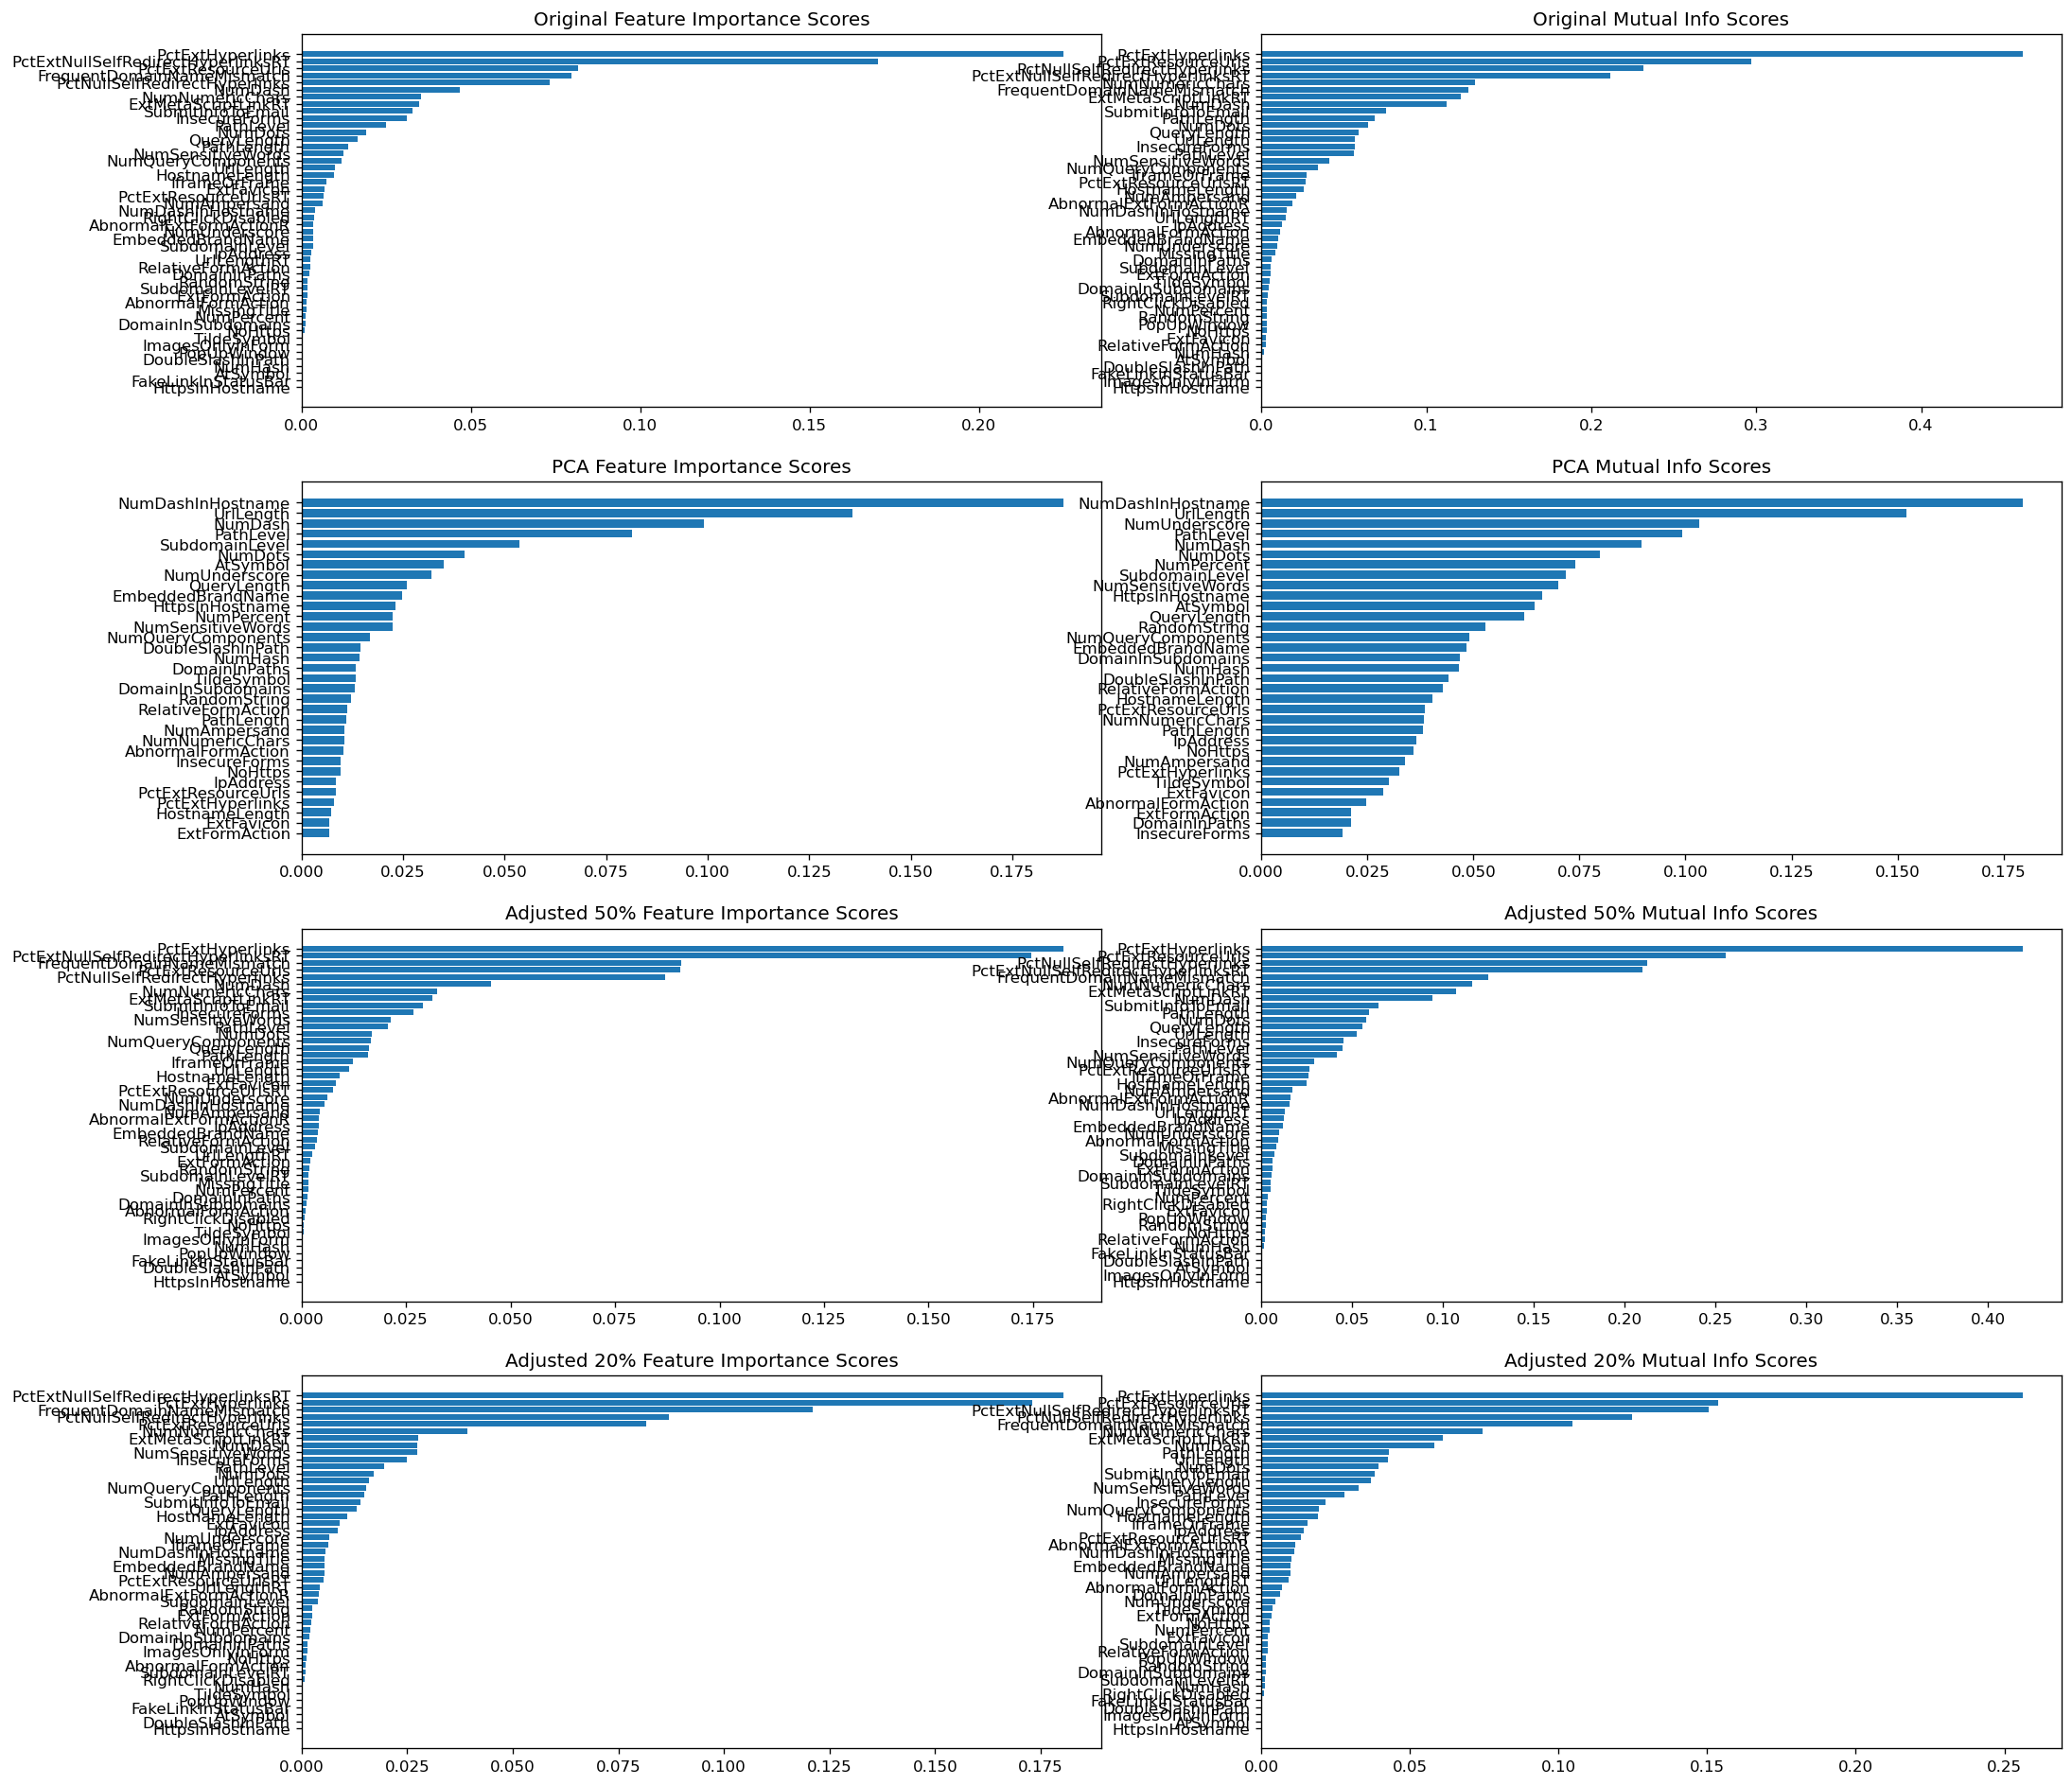

In [182]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

### 4.3.4 GridSearch using F1 Score

In [183]:
###### ORIGINAL DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)],
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.4s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.3s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.3s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.3s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   0.4s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.4s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.4s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.3s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.4s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.3s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   0.5s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   0.4s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.5s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.5s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.5s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.5s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.3s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.4s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.3s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.4s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.4s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.4s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.5s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.5s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.6s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.6s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.5s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.5s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [184]:
###### PCA DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)],
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.9s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.9s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.8s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.9s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.8s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   1.5s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.6s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.5s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.5s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.6s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.5s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   2.0s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   2.1s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.0s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.1s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.1s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.0s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.0s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.0s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.0s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   2.3s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   2.1s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   2.2s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   2.9s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.1s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.1s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.1s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.2s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   3.0s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [185]:
###### ADJUSTED DATASET 50% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)],
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   0.3s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.3s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.3s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.3s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.2s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.3s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   0.4s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   0.4s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.3s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.4s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.4s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.3s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.2s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.2s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.3s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.3s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.3s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.3s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.3s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.5s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.4s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.4s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.4s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.4s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [37]:
###### ADJUSTED DATASET 20% #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 500, num = 10)],
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.2s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.1s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.1s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   0.1s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   0.2s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.2s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.2s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.2s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.2s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   0.2s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   0.3s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   0.3s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.2s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.2s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.2s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   0.2s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.3s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.2s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   0.2s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.2s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.2s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   0.2s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.3s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.3s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.3s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.3s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   0.4s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   0.4s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

#### Checking Feature Importance & Mutual Info

In [187]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [188]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

In [189]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

## 4.4 Gradient Boosting

### 4.4.1 Blind Run

In [190]:
gb_classifier = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

# Original Dataset
clf_og = gb_classifier.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

# PCA (Original Dataset)
clf_PCA = gb_classifier.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

# Adjusted Dataset(50%)
clf_5 = gb_classifier.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

# Adjusted Dataset(20%)
clf_2 = gb_classifier.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

In [191]:
pd.DataFrame(np.array([[acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Accuracy  F1 Score     TP      TN    FP    FN
Original Dataset        0.982500  0.982767  998.0   967.0  21.0  14.0
PCA (Original Dataset)  0.953000  0.953695  968.0   938.0  50.0  44.0
Adjusted Dataset(50%)   0.981333  0.971074  470.0  1002.0  17.0  11.0
Adjusted Dataset(20%)   0.989167  0.966752  189.0   998.0   8.0   5.0

### 4.4.2 Cross Validating

In [192]:
###### Original Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    gb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = gb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_og = pd.DataFrame({'Score':scr,'Fold':fold})

In [193]:
###### PCA Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_PCA)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    gb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = gb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_PCA = pd.DataFrame({'Score':scr,'Fold':fold})

In [194]:
###### Adjusted Dataset 50% ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj5)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    gb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = gb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_5 = pd.DataFrame({'Score':scr,'Fold':fold})

In [195]:
##### Adjusted Dataset 20% #####
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj2)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    gb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = gb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_2 = pd.DataFrame({'Score':scr,'Fold':fold})

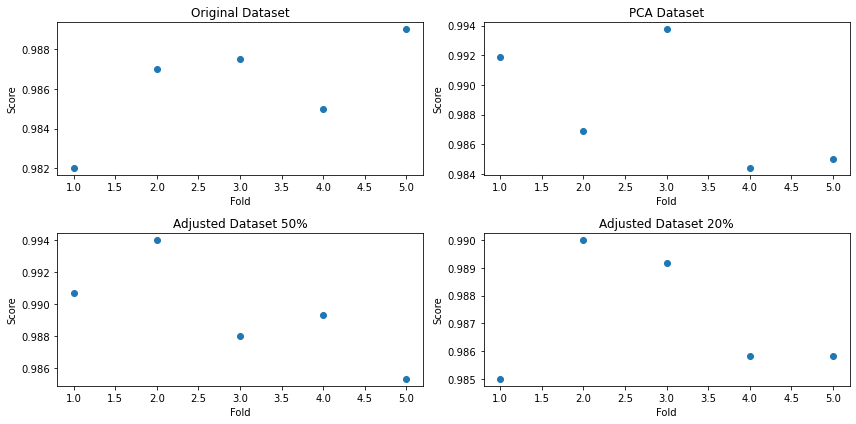

In [196]:
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(performance_og['Fold'], performance_og['Score'])
axs[0,0].set_title("Original Dataset")
axs[0,1].scatter(performance_PCA['Fold'], performance_PCA['Score'])
axs[0,1].set_title("PCA Dataset")
axs[1,0].scatter(performance_5['Fold'], performance_5['Score'])
axs[1,0].set_title("Adjusted Dataset 50%")
axs[1,1].scatter(performance_2['Fold'], performance_2['Score'])
axs[1,1].set_title("Adjusted Dataset 20%")


for ax in axs.flat:
    ax.set(xlabel = 'Fold', ylabel = 'Score')
    
fig.tight_layout()
plt.show()

### 4.4.3 GridSearch using Accuracy

In [202]:
###### ORIGINAL DATASET #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.4s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.5s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.5s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.5s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.4s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   3.1s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   3.0s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   3.1s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   3.2s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   3.4s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=   4.4s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   4.9s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   4.6s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   4.9s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   4.7s


In [203]:
###### PCA DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   6.9s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   7.1s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   7.1s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   7.0s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   7.1s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  12.5s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  12.9s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  13.3s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  13.8s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  14.1s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=  15.9s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  24.1s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  23.6s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  23.6s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  24.5s


In [57]:
###### ADJUSTED DATASET 50% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.0s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.1s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.0s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   0.9s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.0s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.0s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.1s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.0s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.2s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.2s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=   2.5s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   3.4s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   3.3s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   2.8s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   2.9s


In [65]:
X_set = X_test_adj5.copy()
y_set = (pd.DataFrame(pred_5, columns = ['labels'])).copy()
set = X_set.join(y_set)
set['labels'] = set['labels'].fillna(0)

'''set_1 = set[set['labels'] == 1.0]
set_1[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()

set_0 = set[set['labels'] == 0.0]
set_0[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()'''

"set_1 = set[set['labels'] == 1.0]\nset_1[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()\n\nset_0 = set[set['labels'] == 0.0]\nset_0[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()"

In [66]:
set_1 = set[set['labels'] == 1.0]
set_1[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()

PctExtNullSelfRedirectHyperlinksRT  PctExtHyperlinks
count                           43.000000         43.000000
mean                             0.093023          0.336910
std                              0.971350          0.432041
min                             -1.000000          0.000000
25%                             -1.000000          0.000000
50%                              1.000000          0.000000
75%                              1.000000          0.854167
max                              1.000000          1.000000

In [67]:
set_0 = set[set['labels'] == 0.0]
set_0[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()

PctExtNullSelfRedirectHyperlinksRT  PctExtHyperlinks
count                         1457.000000       1457.000000
mean                             0.523679          0.199622
std                              0.785966          0.289593
min                             -1.000000          0.000000
25%                              0.000000          0.003226
50%                              1.000000          0.083333
75%                              1.000000          0.222222
max                              1.000000          1.000000

In [205]:
###### ADJUSTED DATASET 20% #######
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.3s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.3s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.1s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.2s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.2s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.4s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.7s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.5s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.4s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.4s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=   2.9s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   4.1s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   4.0s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   4.3s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   3.8s


In [206]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

C:\Users\Ren\anaconda3\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


Best Estimator  \
Original Dataset        ([DecisionTreeRegressor(criterion='friedman_ms...   
PCA (Original Dataset)  ([DecisionTreeRegressor(criterion='friedman_ms...   
Adjusted Dataset(50%)   ([DecisionTreeRegressor(criterion='friedman_ms...   
Adjusted Dataset(20%)   ([DecisionTreeRegressor(criterion='friedman_ms...   

                        Accuracy  F1 Score    TP    TN  FP  FN  
Original Dataset          0.9865  0.986693  1001   972  16  11  
PCA (Original Dataset)     0.955  0.955357   963   947  41  49  
Adjusted Dataset(50%)       0.98   0.96888   467  1003  16  14  
Adjusted Dataset(20%)   0.985833  0.956743   188   995  11   6

#### Checking Feature Importance & Mutual Info

In [207]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [208]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

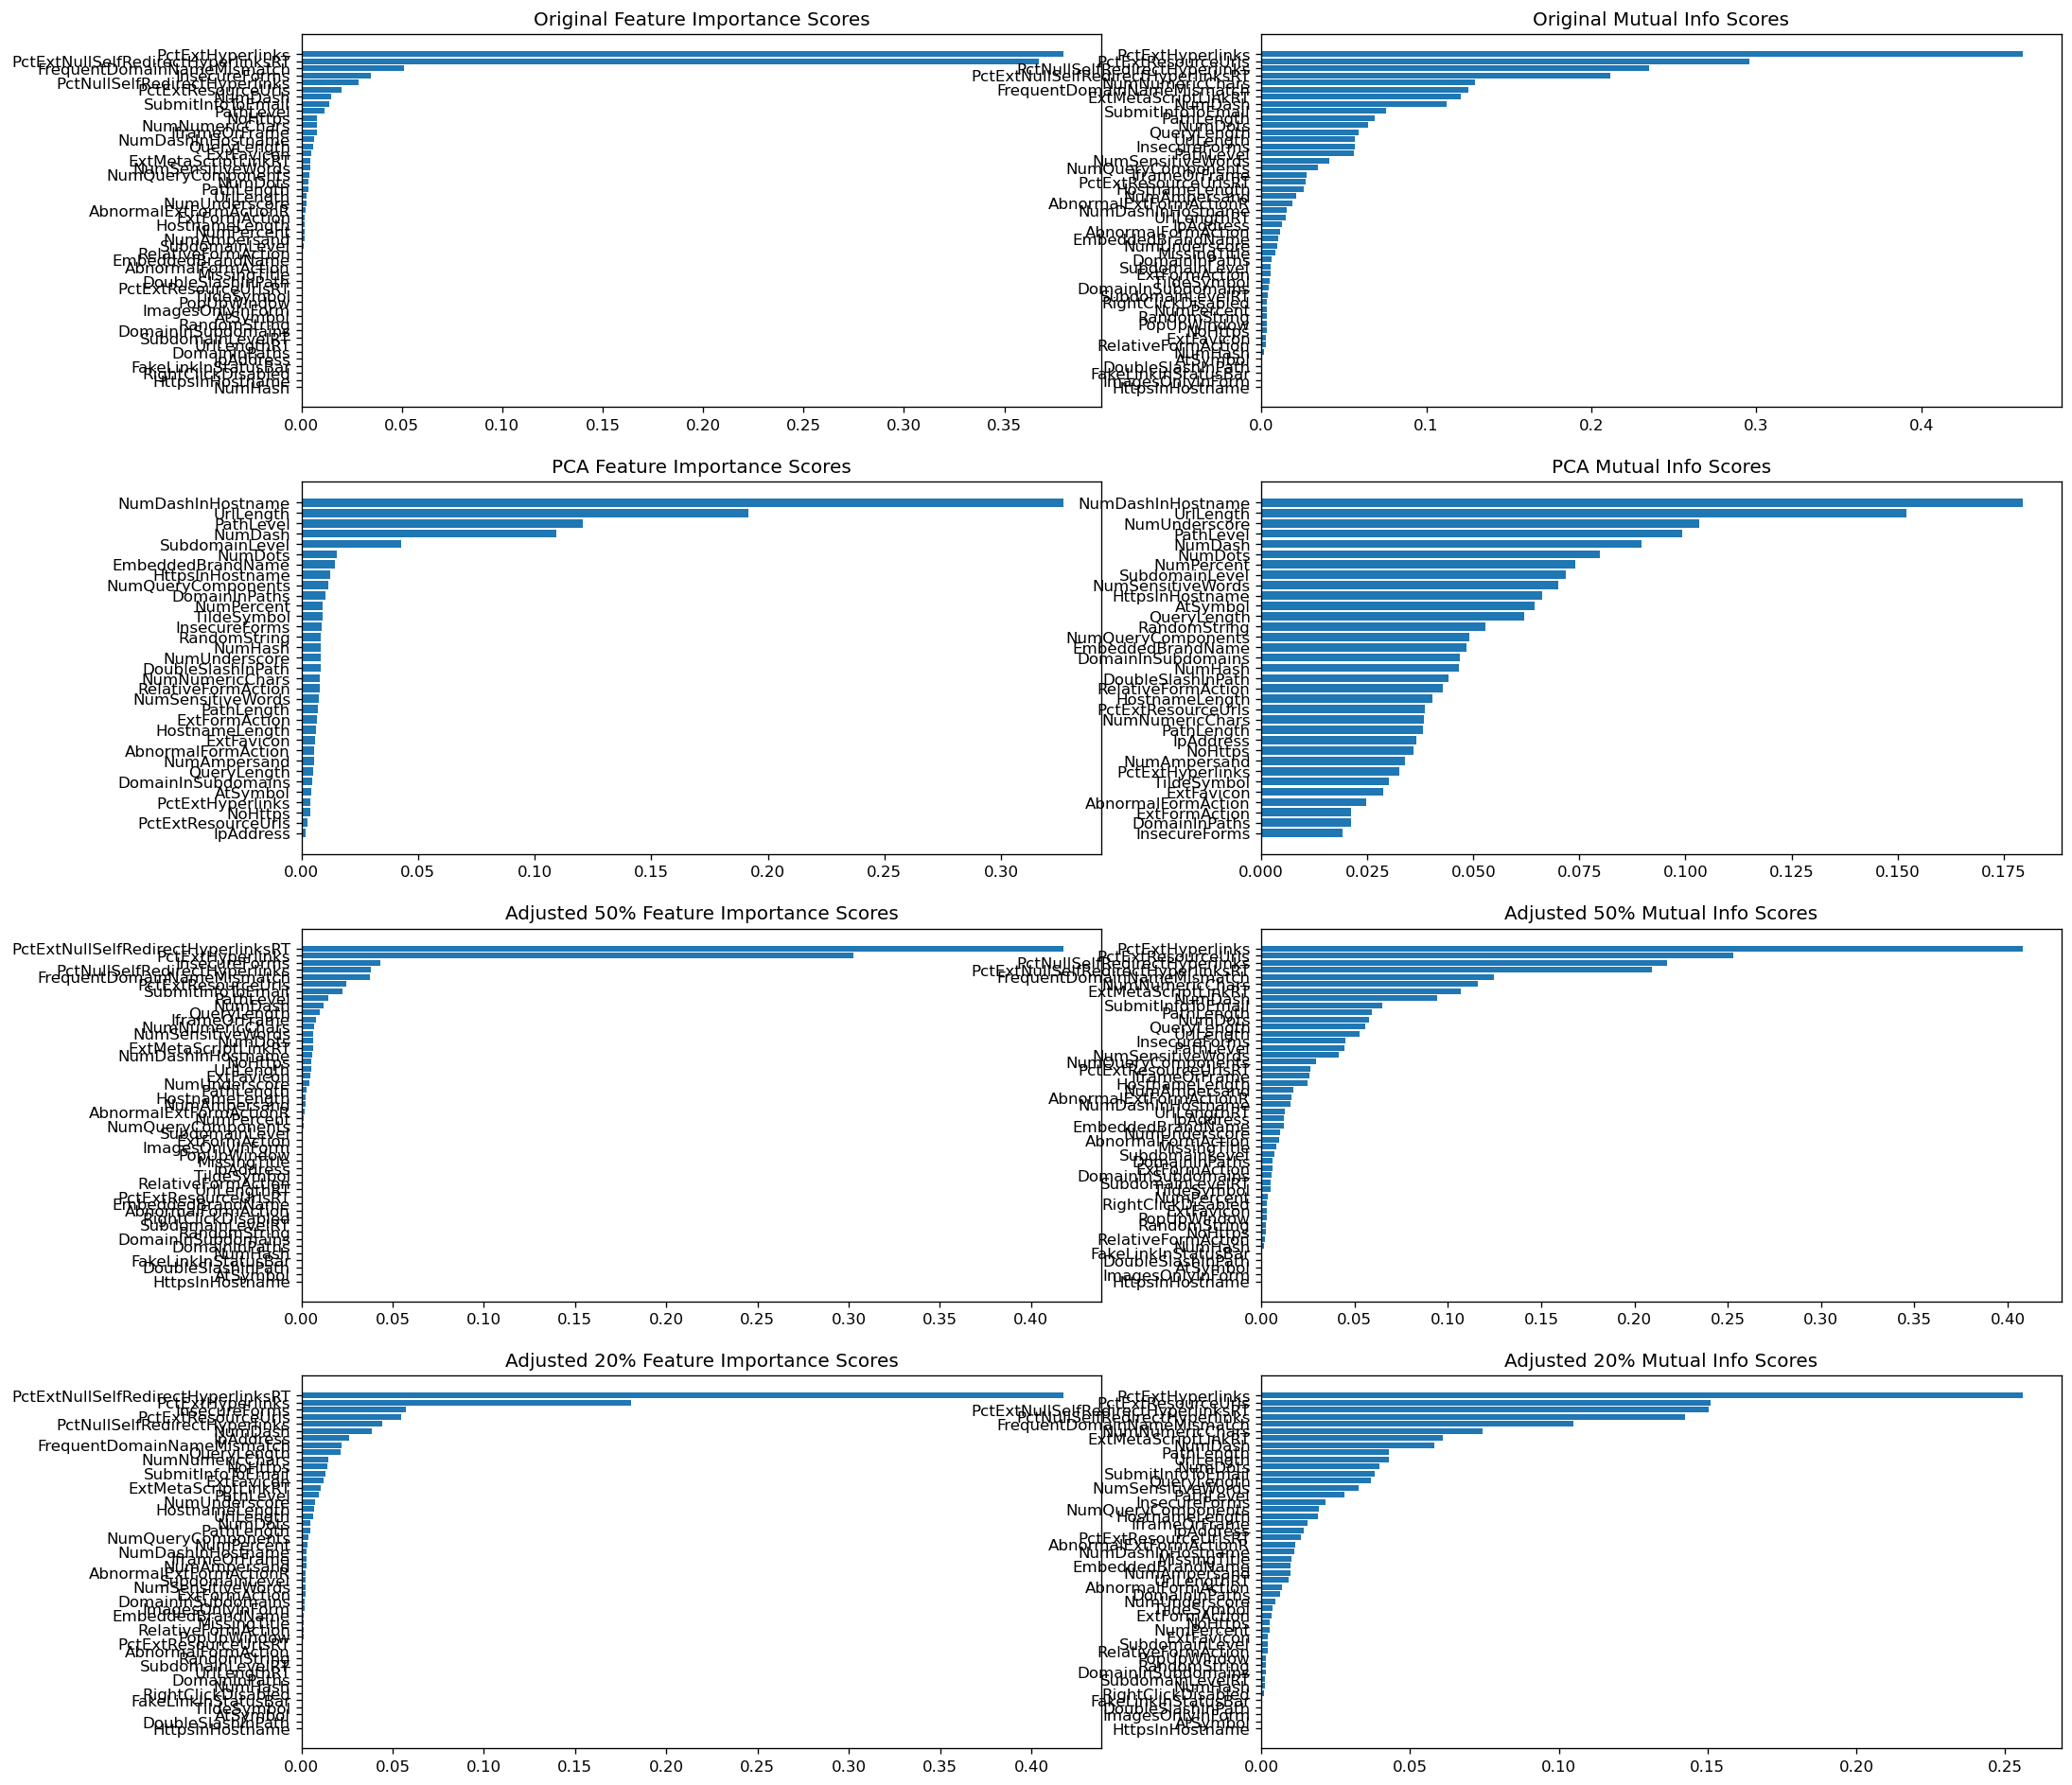

In [209]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

### 4.4.4 GridSearch using F1 Score

In [210]:
###### ORIGINAL DATASET #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 1)
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


In [211]:
###### PCA DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   9.2s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   9.3s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   8.9s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   9.0s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   8.8s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  16.4s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  16.8s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  16.7s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  16.5s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  16.2s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=  19.3s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  20.4s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  19.6s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  19.8s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  19.3s


In [212]:
###### ADJUSTED DATASET 50% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.4s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.2s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.4s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.3s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.4s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.6s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.9s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.9s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.6s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.4s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=   2.8s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   5.8s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   5.9s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   5.8s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   6.2s


In [213]:
###### ADJUSTED DATASET 20% #######
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.7s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.5s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.7s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.4s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=   1.6s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   3.5s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.8s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   3.2s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   3.1s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=   2.9s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=   3.4s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   4.3s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   4.4s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   4.4s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=   4.3s


In [214]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

C:\Users\Ren\anaconda3\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


Best Estimator  \
Original Dataset        ([DecisionTreeRegressor(criterion='friedman_ms...   
PCA (Original Dataset)  ([DecisionTreeRegressor(criterion='friedman_ms...   
Adjusted Dataset(50%)   ([DecisionTreeRegressor(criterion='friedman_ms...   
Adjusted Dataset(20%)   ([DecisionTreeRegressor(criterion='friedman_ms...   

                        Accuracy  F1 Score    TP    TN  FP  FN  
Original Dataset          0.9865  0.986693  1001   972  16  11  
PCA (Original Dataset)    0.9595  0.959921   970   949  39  42  
Adjusted Dataset(50%)   0.980667  0.969948   468  1003  16  13  
Adjusted Dataset(20%)   0.989167  0.966752   189   998   8   5

#### Checking Feature Importance & Mutual Info

In [215]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [216]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

In [217]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

## 4.5 XGB

### 4.5.1 Blind Run

In [226]:
#create the classifier
xgb_classifier = XGBClassifier(use_label_encoder =False, eval_metric='mlogloss')

# Original Dataset
clf_og = xgb_classifier.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

# PCA (Original Dataset)
clf_PCA = xgb_classifier.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

# Adjusted Dataset(50%)
clf_5 = xgb_classifier.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

# Adjusted Dataset(20%)
clf_2 = xgb_classifier.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)


In [227]:
pd.DataFrame(np.array([[acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Accuracy  F1 Score      TP      TN    FP    FN
Original Dataset          0.9885  0.988676  1004.0   973.0  15.0   8.0
PCA (Original Dataset)    0.9590  0.959366   968.0   950.0  38.0  44.0
Adjusted Dataset(50%)     0.9800  0.969008   469.0  1001.0  18.0  12.0
Adjusted Dataset(20%)     0.9900  0.969231   189.0   999.0   7.0   5.0

### 4.5.1 Cross Validating

In [229]:
###### Original Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    xgb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = xgb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_og = pd.DataFrame({'Score':scr,'Fold':fold})

In [230]:
###### PCA Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_PCA)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    xgb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = xgb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_PCA = pd.DataFrame({'Score':scr,'Fold':fold})

In [231]:
###### Adjusted Dataset 50% ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj5)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    xgb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = xgb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_5 = pd.DataFrame({'Score':scr,'Fold':fold})

In [232]:
##### Adjusted Dataset 20% #####
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj2)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['labels']
    valid_feats = valid[features]
    valid_label = valid['labels']
    xgb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = xgb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_2 = pd.DataFrame({'Score':scr,'Fold':fold})

In [233]:
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(performance_og['Fold'], performance_og['Score'])
axs[0,0].set_title("Original Dataset")
axs[0,1].scatter(performance_PCA['Fold'], performance_PCA['Score'])
axs[0,1].set_title("PCA Dataset")
axs[1,0].scatter(performance_5['Fold'], performance_5['Score'])
axs[1,0].set_title("Adjusted Dataset 50%")
axs[1,1].scatter(performance_2['Fold'], performance_2['Score'])
axs[1,1].set_title("Adjusted Dataset 20%")


for ax in axs.flat:
    ax.set(xlabel = 'Fold', ylabel = 'Score')
    
fig.tight_layout()
plt.show()

### 4.5.3 GridSearch using Accuracy

In [240]:
###### ORIGINAL DATASET #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}

# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)

#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   0.9s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   0.9s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   0.8s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   0.9s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   0.9s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.1s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.1s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.1s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   0.8s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   0.9s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   0.8s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   0.9s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   0.9s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   0.8s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   0.9s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   0.9s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   0.7s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   1.0s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   1.0s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   0.9s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   0.8s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   0.9s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   0.9s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.0s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.2s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.0s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.1s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   1.4s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   1.5s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [241]:
###### PCA DATASET #######
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.2s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.2s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.2s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.1s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.1s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.2s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.3s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.3s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.9s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.0s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.0s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.3s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.2s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.1s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.2s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.1s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   2.1s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   2.2s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   2.3s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.1s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.1s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.2s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.1s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.6s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.7s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.6s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.7s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   2.1s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   2.2s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [61]:
###### ADJUSTED DATASET 20% #######
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.0s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   0.2s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   0.1s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   0.1s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   0.1s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   0.1s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   0.1s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   0.1s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   0.1s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   0.1s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   0.1s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   0.1s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   0.1s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   0.1s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   0.1s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   0.1s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   0.1s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   0.1s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   0.1s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   0.1s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   0.1s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   0.1s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   0.1s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   0.1s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   0.1s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   0.1s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   0.1s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   0.2s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   0.2s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [62]:
X_set = X_test_adj2.copy()
y_set = (pd.DataFrame(pred_2, columns = ['labels'])).copy()
set = X_set.join(y_set)
set['labels'] = set['labels'].fillna(0)

'''set_1 = set[set['labels'] == 1.0]
set_1[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()

set_0 = set[set['labels'] == 0.0]
set_0[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()'''

"set_1 = set[set['labels'] == 1.0]\nset_1[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()\n\nset_0 = set[set['labels'] == 0.0]\nset_0[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()"

In [63]:
set_0 = set[set['labels'] == 0.0]
set_0[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()

PctExtNullSelfRedirectHyperlinksRT  PctExtHyperlinks
count                         1194.000000       1194.000000
mean                             0.654941          0.170134
std                              0.663903          0.229846
min                             -1.000000          0.000000
25%                              1.000000          0.024783
50%                              1.000000          0.090359
75%                              1.000000          0.201778
max                              1.000000          1.000000

In [64]:
set_1 = set[set['labels'] == 1.0]
set_1[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()

PctExtNullSelfRedirectHyperlinksRT  PctExtHyperlinks
count                            6.000000          6.000000
mean                             0.000000          0.461629
std                              0.894427          0.432802
min                             -1.000000          0.000000
25%                             -0.750000          0.093750
50%                              0.000000          0.423349
75%                              0.750000          0.810232
max                              1.000000          1.000000

In [243]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Best Estimator  \
Original Dataset        XGBClassifier(base_score=0.5, booster='gbtree'...   
PCA (Original Dataset)  XGBClassifier(base_score=0.5, booster='gbtree'...   
Adjusted Dataset(50%)   ([DecisionTreeRegressor(criterion='friedman_ms...   
Adjusted Dataset(20%)   XGBClassifier(base_score=0.5, booster='gbtree'...   

                        Accuracy  F1 Score    TP    TN  FP  FN  
Original Dataset           0.988  0.988189  1004   972  16   8  
PCA (Original Dataset)     0.966  0.966337   976   956  32  36  
Adjusted Dataset(50%)       0.98  0.969008   469  1001  18  12  
Adjusted Dataset(20%)   0.990833  0.971722   189  1000   6   5

#### Checking Feature Importance & Mutual Info

In [244]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [245]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

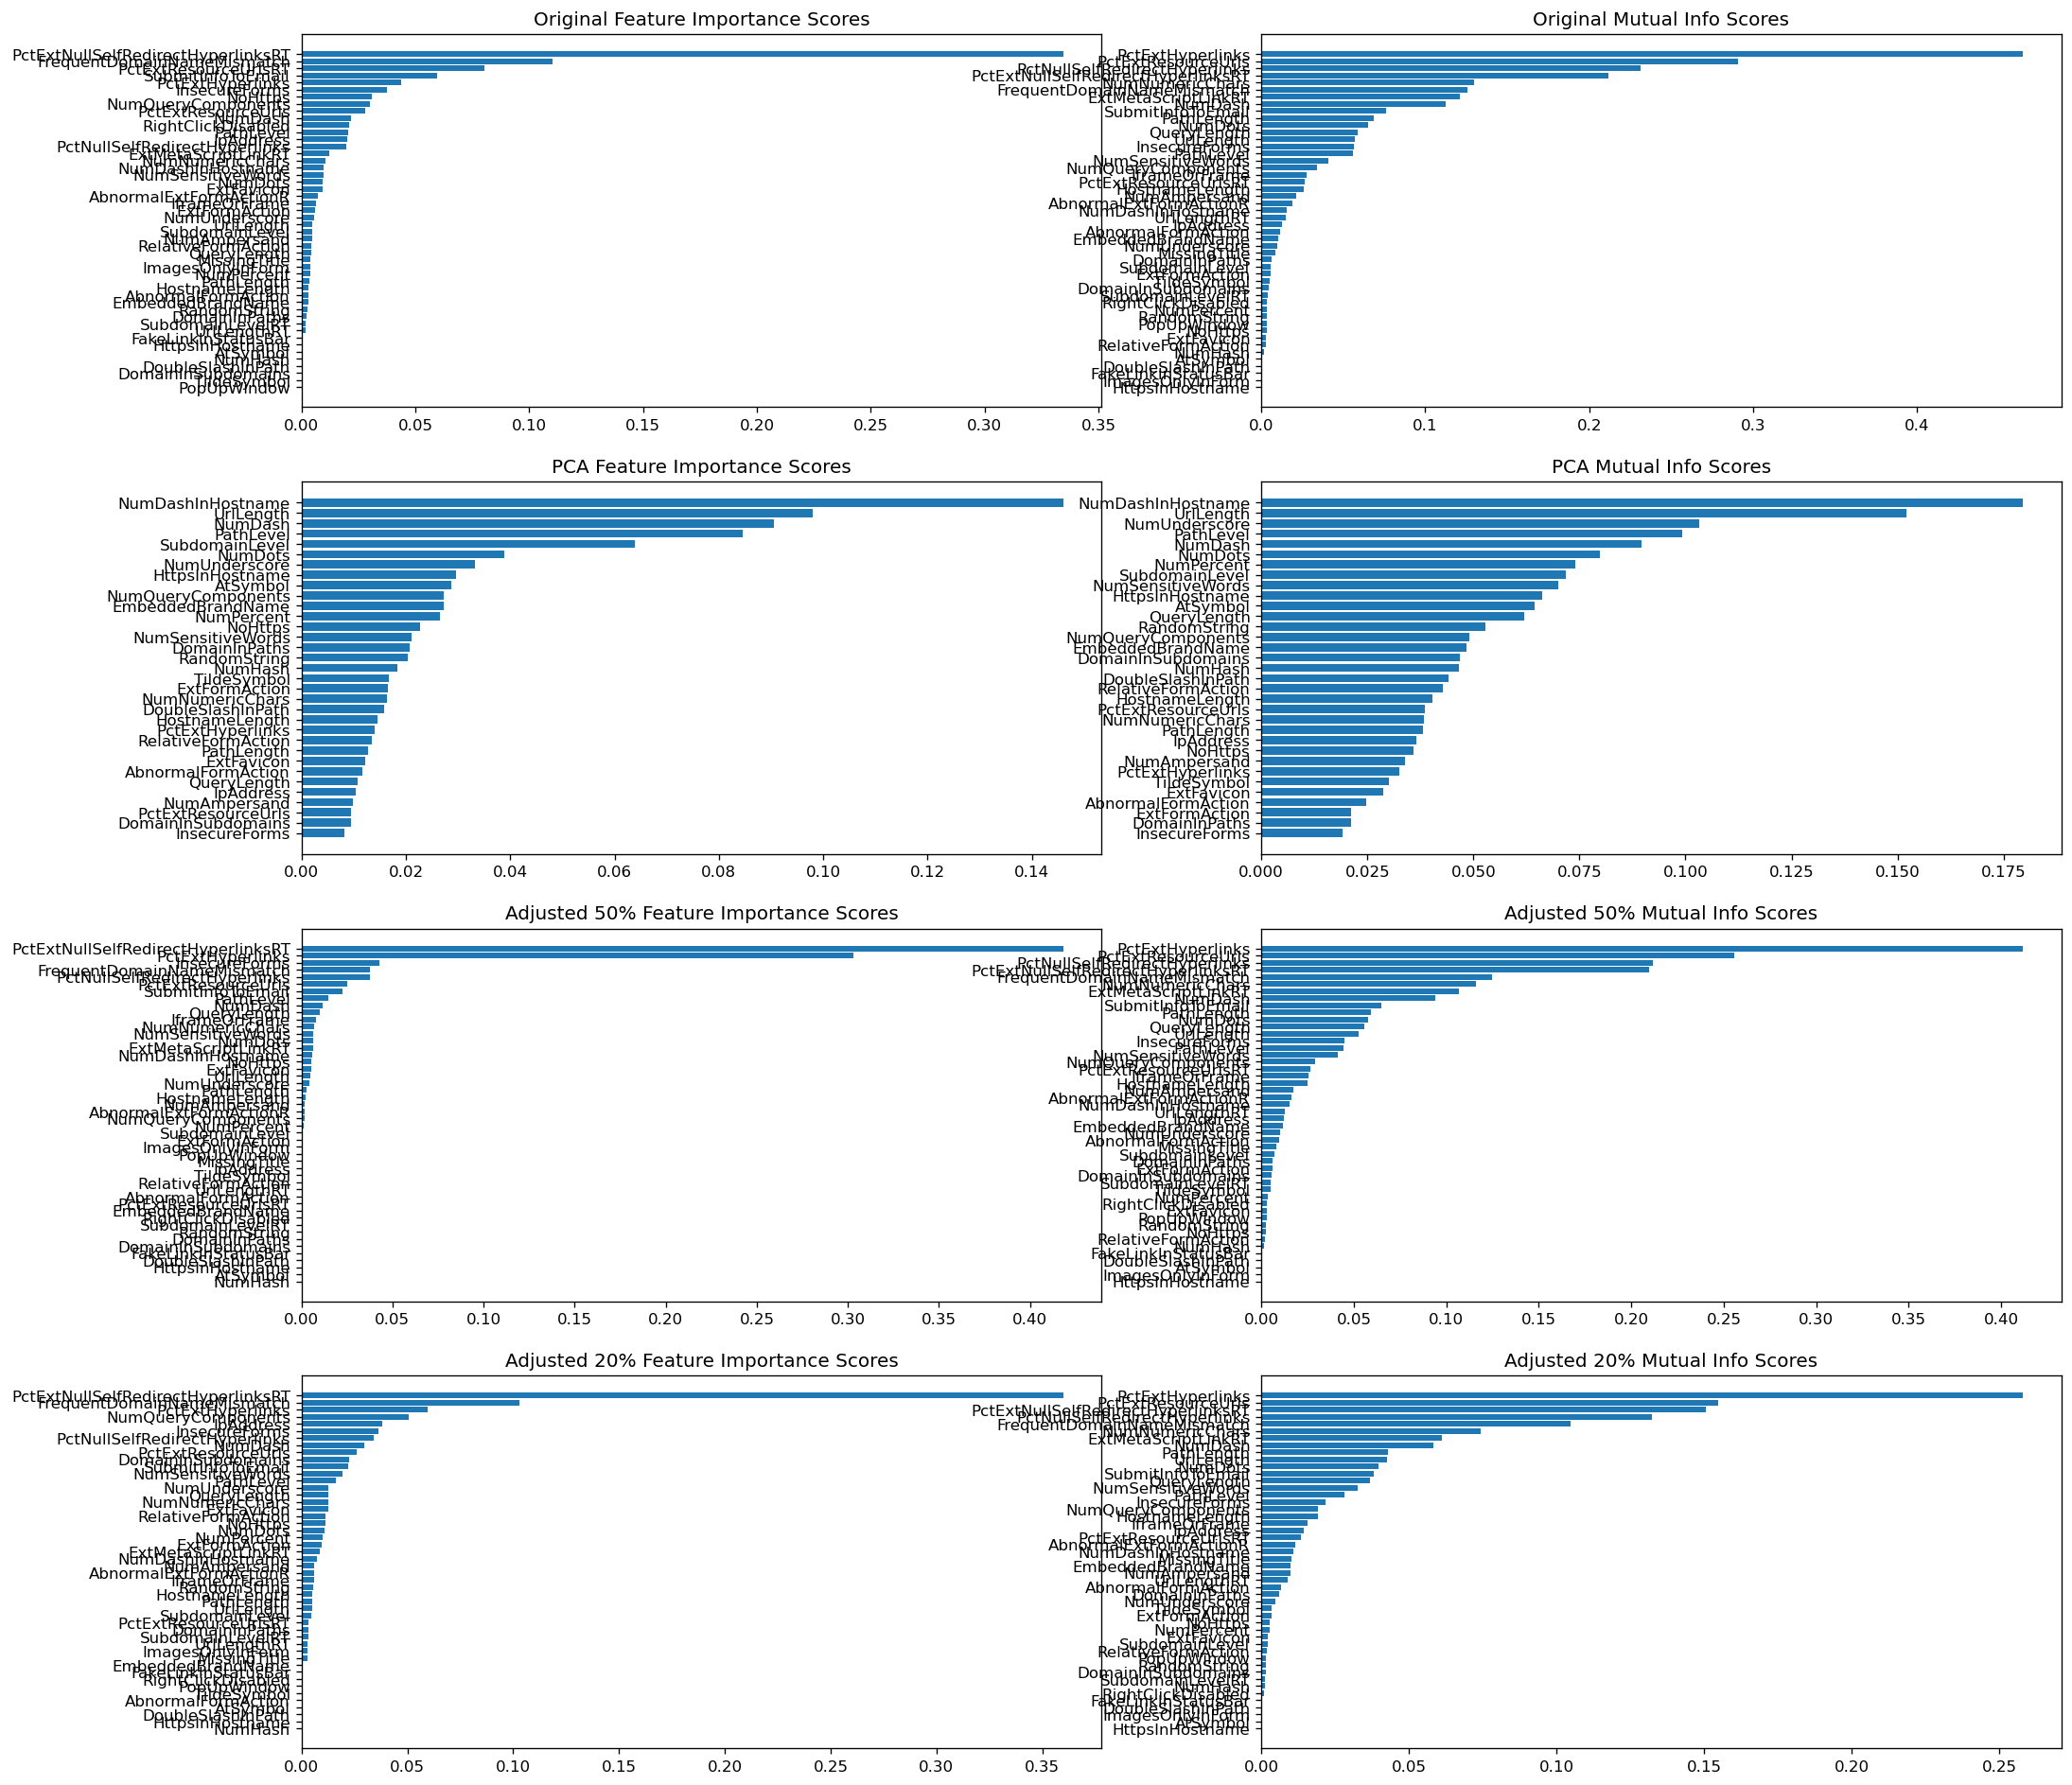

In [246]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

### 4.5.4 GridSearch Using F1 Score

In [247]:
###### ORIGINAL DATASET #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.0s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.1s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   0.9s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.2s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.0s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.0s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.1s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   0.9s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.0s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   0.8s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.0s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.3s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.1s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.2s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.0s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.1s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   1.1s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   1.0s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   1.2s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.2s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.0s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.2s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.1s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.1s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.1s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.2s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.3s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   1.3s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   1.4s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [248]:
###### PCA DATASET #######
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.4s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.1s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.1s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.2s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.1s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.2s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.3s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.4s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.9s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.0s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.1s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.8s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.1s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.1s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.9s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.8s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   1.7s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   1.8s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   2.0s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.0s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.9s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.2s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.8s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   3.0s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   3.0s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.8s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.8s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   4.0s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   4.0s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [249]:
###### ADJUSTED DATASET 50% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.3s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.0s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.3s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.2s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.5s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.6s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.4s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.5s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.3s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.4s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.0s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.3s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.3s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.0s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.3s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.1s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   1.0s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   1.4s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   1.1s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.1s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.2s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.1s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.2s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.2s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.6s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.3s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   1.3s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   1.9s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   1.5s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [250]:
###### ADJUSTED DATASET 20% #######
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.1s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.3s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.4s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.0s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.1s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.1s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.1s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.2s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.5s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   0.9s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.5s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   0.9s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.1s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.0s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   0.9s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.1s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   1.0s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   0.9s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   0.9s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   0.8s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   0.8s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   0.8s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   0.8s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   0.8s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   0.7s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   0.8s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   0.8s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   1.1s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   1.2s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [251]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Best Estimator  \
Original Dataset        XGBClassifier(base_score=0.5, booster='gbtree'...   
PCA (Original Dataset)  XGBClassifier(base_score=0.5, booster='gbtree'...   
Adjusted Dataset(50%)   XGBClassifier(base_score=0.5, booster='gbtree'...   
Adjusted Dataset(20%)   XGBClassifier(base_score=0.5, booster='gbtree'...   

                        Accuracy  F1 Score    TP    TN  FP  FN  
Original Dataset           0.989  0.989163  1004   974  14   8  
PCA (Original Dataset)     0.966  0.966337   976   956  32  36  
Adjusted Dataset(50%)   0.978667  0.966942   468  1000  19  13  
Adjusted Dataset(20%)   0.991667  0.974359   190  1000   6   4

#### Checking Feature Importance & Mutual Info

In [252]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [253]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

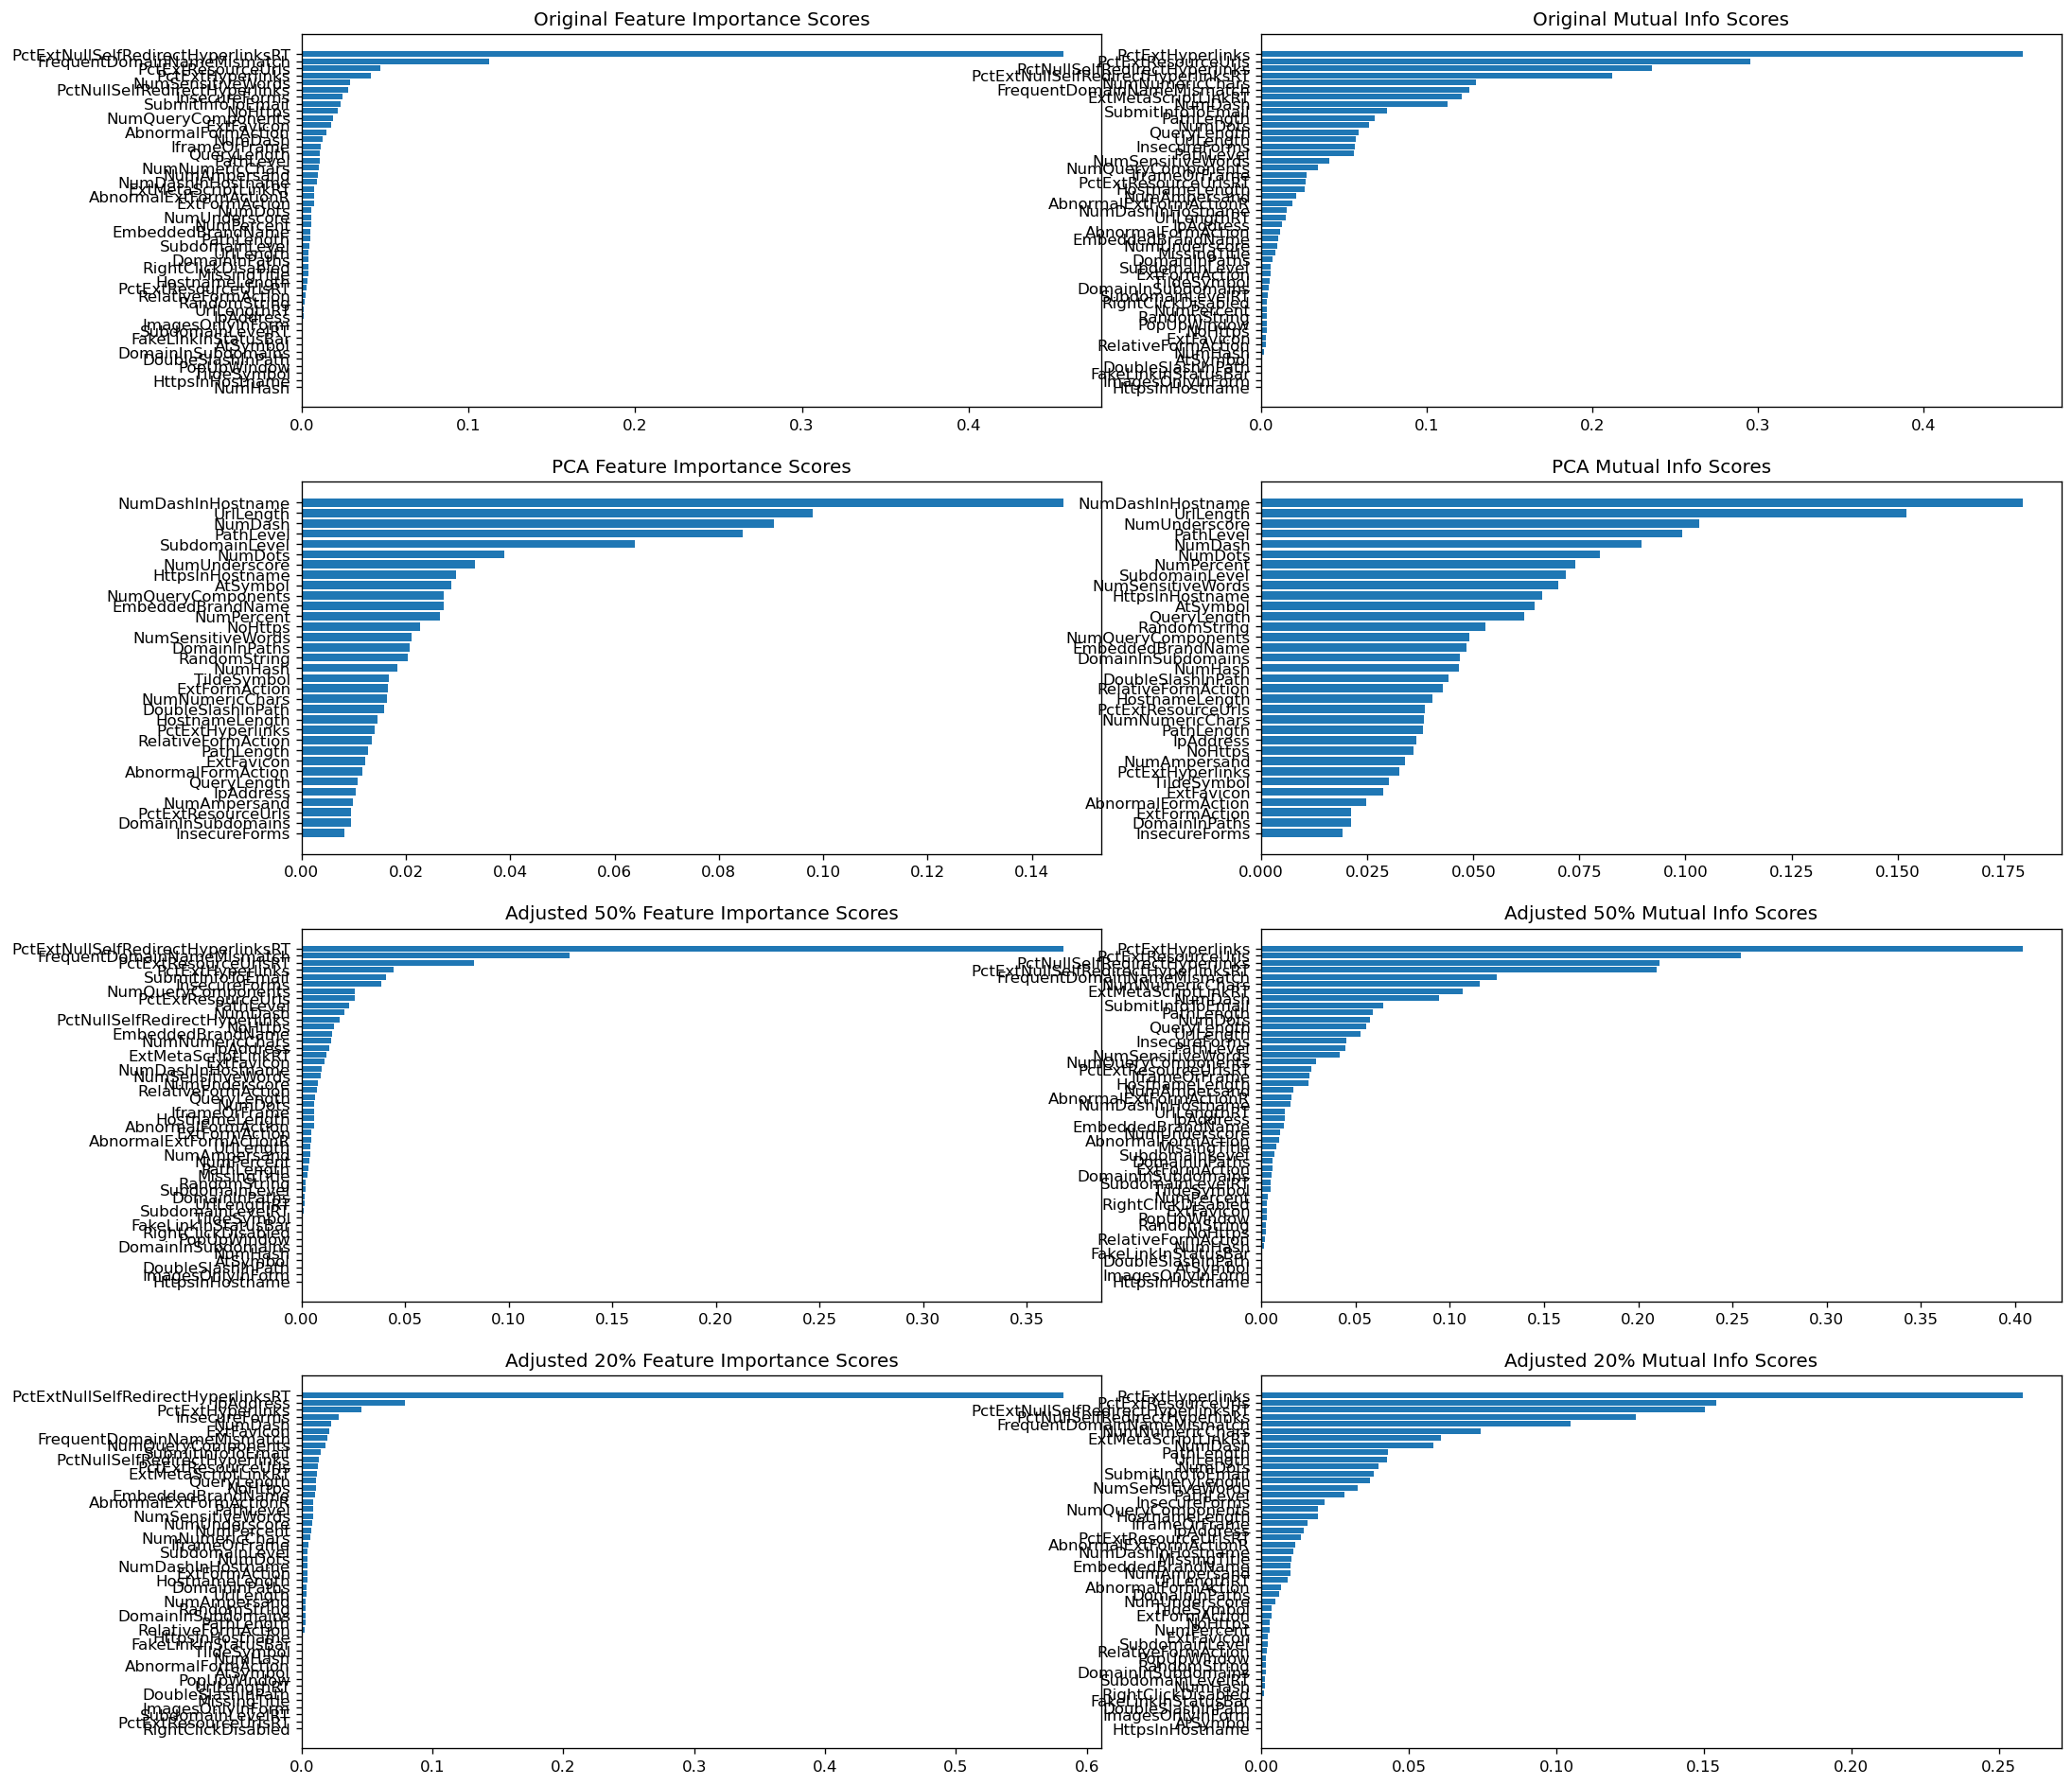

In [254]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

In [28]:
X_dt = X_test.copy()
y_dt = (pd.DataFrame(predictions, columns = ['labels'])).copy()
dt = X_dt.join(y_dt)
dt['labels'] = dt['labels'].fillna(0)
dt

NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
6252        1               0          3         60        5   
4684        3               1          5         75        0   
1731        1               0          3         64        0   
4742        3               0          4         71        0   
4521        3               1          2         52        0   
...       ...             ...        ...        ...      ...   
6412        3               1          1         99        7   
8285        2               0          2         59        0   
7853        1               0          1         67        4   
1095        1               0          4         79        1   
6929        2               1          2         79        0   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
6252                  0         0            0              0           0   
4684                  0         0            0              0           0   
1731                  0         0            0              0           0   
4742                  0         0            0              0           0   
4521                  0         0            0              0           0   
...                 ...       ...          ...            ...         ...   
6412                  0         0            0              2           0   
8285                  0         0            0              3           0   
7853                  0         0            0              0           0   
1095                  0         0            0              0           0   
6929                  0         0            0              0           0   

      NumQueryComponents  NumAmpersand  NumHash  NumNumericChars  NoHttps  \
6252                   0             0        0                8        1   
4684                   1             0        0                0        1   
1731                   0             0        0               20        1   
4742                   1             0        0                4        1   
4521                   0             0        0                1        1   
...                  ...           ...      ...              ...      ...   
6412                   0             0        0                2        1   
8285                   0             0        0                0        1   
7853                   0             0        0                0        1   
1095                   0             0        0               28        1   
6929                   4             3        0                6        1   

      RandomString  IpAddress  DomainInSubdomains  DomainInPaths  \
6252             1          0                   0              1   
4684             0          0                   0              1   
1731             1          0                   0              0   
4742             0          0                   0              1   
4521             1          0                   0              0   
...            ...        ...                 ...            ...   
6412             0          0                   0              1   
8285             1          0                   0              0   
7853             1          0                   0              1   
1095             1          0                   0              0   
6929             0          0                   0              1   

      HttpsInHostname  HostnameLength  PathLength  QueryLength  \
6252                0              10          43            0   
4684                0              15          48            4   
1731                0              19          38            0   
4742                0              10          29           24   
4521                0              12          33            0   
...               ...             ...         ...          ...   
6412                0              25          67            0   
8285                0               8     

In [29]:
dt_1 = dt[dt['labels'] == 1.0]
dt_1.describe()

NumDots  SubdomainLevel   PathLevel   UrlLength     NumDash  \
count  212.000000      212.000000  212.000000  212.000000  212.000000   
mean     2.995283        0.551887    3.712264   70.358491    0.613208   
std      2.068719        1.314212    1.593006   41.495318    1.310336   
min      1.000000        0.000000    1.000000   19.000000    0.000000   
25%      2.000000        0.000000    3.000000   44.000000    0.000000   
50%      2.000000        0.000000    3.500000   58.000000    0.000000   
75%      4.000000        1.000000    5.000000   78.250000    1.000000   
max     14.000000       11.000000   10.000000  242.000000   11.000000   

       NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  NumPercent  \
count         212.000000     212.0   212.000000     212.000000  212.000000   
mean            0.155660       0.0     0.018868       0.245283    0.004717   
std             0.541471       0.0     0.136381       0.874183    0.068680   
min             0.000000       0.0     0.000000       0.000000    0.000000   
25%             0.000000       0.0     0.000000       0.000000    0.000000   
50%             0.000000       0.0     0.000000       0.000000    0.000000   
75%             0.000000       0.0     0.000000       0.000000    0.000000   
max             4.000000       0.0     1.000000       7.000000    1.000000   

       NumQueryComponents  NumAmpersand     NumHash  NumNumericChars  NoHttps  \
count          212.000000    212.000000  212.000000       212.000000    212.0   
mean             0.396226      0.297170    0.009434         7.259434      1.0   
std              1.181847      1.404594    0.096898        12.709427      0.0   
min              0.000000      0.000000    0.000000         0.000000      1.0   
25%              0.000000      0.000000    0.000000         0.000000      1.0   
50%              0.000000      0.000000    0.000000         0.000000      1.0   
75%              0.000000      0.000000    0.000000        10.250000      1.0   
max              8.000000     12.000000    1.000000        74.000000      1.0   

       RandomString   IpAddress  DomainInSubdomains  DomainInPaths  \
count    212.000000  212.000000          212.000000     212.000000   
mean       0.462264    0.066038            0.037736       0.325472   
std        0.499754    0.248936            0.191008       0.469660   
min        0.000000    0.000000            0.000000       0.000000   
25%        0.000000    0.000000            0.000000       0.000000   
50%        0.000000    0.000000            0.000000       0.000000   
75%        1.000000    0.000000            0.000000       1.000000   
max        1.000000    1.000000            1.000000       1.000000   

       HttpsInHostname  HostnameLength  PathLength  QueryLength  \
count            212.0      212.000000  212.000000   212.000000   
mean               0.0       19.400943   32.259434    11.273585   
std                0.0       10.122688   19.920545    29.791227   
min                0.0        7.000000    3.000000     0.000000   
25%                0.0       14.000000   18.000000     0.000000   
50%                0.0       17.000000   29.000000     0.000000   
75%                0.0       22.000000   43.000000     0.000000   
max                0.0       84.000000  112.000000   174.000000   

       DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  \
count              212.0         212.000000         212.000000   
mean                 0.0           0.183962           0.099057   
std                  0.0           0.434449           0.299445   
min                  0.0           0.000000           0.000000   
25%                  0.0           0.000000           0.000000   
50%                  0.0           0.000000           0.000000   
75%                  0.0           0.000000           0.000000   
max                  0.0           2.000000           1.000000   

       PctExtHyperlinks  PctExtResourceUrls  ExtFavicon  InsecureForms  \
count        21

In [30]:
dt_0 = dt[dt['labels'] == 0.0]
dt_0.describe()

NumDots  SubdomainLevel    PathLevel    UrlLength      NumDash  \
count  1788.000000     1788.000000  1788.000000  1788.000000  1788.000000   
mean      2.394855        0.593960     3.228747    71.354586     1.946309   
std       1.221710        0.762589     1.834117    33.568889     3.088224   
min       1.000000        0.000000     0.000000    14.000000     0.000000   
25%       2.000000        0.000000     2.000000    48.000000     0.000000   
50%       2.000000        1.000000     3.000000    64.000000     1.000000   
75%       3.000000        1.000000     4.000000    86.000000     2.000000   
max      16.000000        9.000000    15.000000   241.000000    20.000000   

       NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore   NumPercent  \
count        1788.000000    1788.0  1788.000000    1788.000000  1788.000000   
mean            0.128076       0.0     0.011745       0.351230     0.085011   
std             0.515930       0.0     0.107766       1.194894     0.631693   
min             0.000000       0.0     0.000000       0.000000     0.000000   
25%             0.000000       0.0     0.000000       0.000000     0.000000   
50%             0.000000       0.0     0.000000       0.000000     0.000000   
75%             0.000000       0.0     0.000000       0.000000     0.000000   
max             8.000000       0.0     1.000000      18.000000    11.000000   

       NumQueryComponents  NumAmpersand      NumHash  NumNumericChars  \
count         1788.000000   1788.000000  1788.000000      1788.000000   
mean             0.517338      0.323266     0.001678         5.792506   
std              1.415887      1.154333     0.040939         9.454394   
min              0.000000      0.000000     0.000000         0.000000   
25%              0.000000      0.000000     0.000000         0.000000   
50%              0.000000      0.000000     0.000000         2.000000   
75%              0.000000      0.000000     0.000000         8.000000   
max             15.000000     13.000000     1.000000        87.000000   

           NoHttps  RandomString    IpAddress  DomainInSubdomains  \
count  1788.000000   1788.000000  1788.000000         1788.000000   
mean      0.988255      0.531320     0.009508            0.021812   
std       0.107766      0.499158     0.097071            0.146110   
min       0.000000      0.000000     0.000000            0.000000   
25%       1.000000      0.000000     0.000000            0.000000   
50%       1.000000      1.000000     0.000000            0.000000   
75%       1.000000      1.000000     0.000000            0.000000   
max       1.000000      1.000000     1.000000            1.000000   

       DomainInPaths  HttpsInHostname  HostnameLength   PathLength  \
count    1788.000000           1788.0     1788.000000  1788.000000   
mean        0.460291              0.0       18.737136    35.915548   
std         0.498560              0.0        7.916268    24.786004   
min         0.000000              0.0        6.000000     0.000000   
25%         0.000000              0.0       14.000000    17.750000   
50%         0.000000              0.0       18.000000    31.000000   
75%         1.000000              0.0       22.000000    49.000000   
max         1.000000              0.0       94.000000   156.000000   

       QueryLength  DoubleSlashInPath  NumSensitiveWords  EmbeddedBrandName  \
count  1788.000000        1788.000000        1788.000000        1788.000000   
mean      9.445190           0.001119           0.098434           0.050895   
std      25.414324           0.033436           0.349815           0.219844   
min       0.000000           0.000000           0.000000           0.000000   
25%       0.000000           0.000000           0.000000           0.000000   
50%       0.000000           0.000000           0.000000           0.000000   
75%       0.000000           0.000000           0.000000           0.000000   
max     182.000000           1.000000           3.000000      